In [1]:
import arrow
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import pandas as pd
import pickle
import xarray as xr

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 14

## The Grid ##

In [3]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
#mesh = nc.Dataset('../../../myResults/mesh_mask201702.nc')
gdepw = mesh.variables['gdepw_1d'][0]
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
#bathy = nc.Dataset('../../../myResults/bathymetry_201702.nc')
lats = bathy.variables['nav_lat'][:]
lons = bathy.variables['nav_lon'][:]
gdept = mesh.variables['gdept_1d'][0]
mesh.close()
bathy.close()

## Get the Data ##

In [4]:
def check_nan(ds):
    for j, index in enumerate(ds.index):
        if ds.transport[j] != ds.transport[j]:
            print (index)

In [5]:
Vic_to_PR_2015 = pd.read_csv('Vic_to_PR_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', Vic_to_PR_2015.transport.mean()/1000.); check_nan(Vic_to_PR_2015)
Vic_to_PR_2016 = pd.read_csv('Vic_to_PR_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', Vic_to_PR_2016.transport.mean()/1000.); check_nan(Vic_to_PR_2016)
Vic_to_PR_2017 = pd.read_csv('Vic_to_PR_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', Vic_to_PR_2017.transport.mean()/1000.); check_nan(Vic_to_PR_2017)
Vic_to_PR_2018 = pd.read_csv('Vic_to_PR_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', Vic_to_PR_2018.transport.mean()/1000.); check_nan(Vic_to_PR_2018)

2015 23.2609609498734
2016 23.97500188093224
2017 24.207005729799395
2018 23.22579033595232


In [6]:
Vic_to_GI_2015 = pd.read_csv('Vic_to_GI_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', Vic_to_GI_2015.transport.mean()/1000.); check_nan(Vic_to_GI_2015)
Vic_to_GI_2016 = pd.read_csv('Vic_to_GI_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', Vic_to_GI_2016.transport.mean()/1000.); check_nan(Vic_to_GI_2016)
Vic_to_GI_2017 = pd.read_csv('Vic_to_GI_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', Vic_to_GI_2017.transport.mean()/1000.); check_nan(Vic_to_GI_2017)
Vic_to_GI_2018 = pd.read_csv('Vic_to_GI_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', Vic_to_GI_2018.transport.mean()/1000.); check_nan(Vic_to_GI_2018)

2015 2.357789516901223
2016 2.1163811267552926
2017 2.253939800455463
2018 2.1046988741053907


In [7]:
PR_from_Vic_2015 = pd.read_csv('PR_from_Vic_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', PR_from_Vic_2015.transport.mean()/1000.); check_nan(PR_from_Vic_2015)
PR_from_Vic_2016 = pd.read_csv('PR_from_Vic_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', PR_from_Vic_2016.transport.mean()/1000.); check_nan(PR_from_Vic_2016)
PR_from_Vic_2017 = pd.read_csv('PR_from_Vic_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', PR_from_Vic_2017.transport.mean()/1000.); check_nan(PR_from_Vic_2017)
PR_from_Vic_2018 = pd.read_csv('PR_from_Vic_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', PR_from_Vic_2018.transport.mean()/1000.); check_nan(PR_from_Vic_2018)

2015 23.16950381813652
2016 23.663626086798114
2017 24.14207376302192
2018 23.62750203239279


In [8]:
GI_from_Vic_2015 = pd.read_csv('GI_from_Vic_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', GI_from_Vic_2015.transport.mean()/1000.); check_nan(GI_from_Vic_2015)
GI_from_Vic_2016 = pd.read_csv('GI_from_Vic_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', GI_from_Vic_2016.transport.mean()/1000.); check_nan(GI_from_Vic_2016)
GI_from_Vic_2017 = pd.read_csv('GI_from_Vic_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', GI_from_Vic_2017.transport.mean()/1000.); check_nan(GI_from_Vic_2017)
GI_from_Vic_2018 = pd.read_csv('GI_from_Vic_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', GI_from_Vic_2018.transport.mean()/1000.); check_nan(GI_from_Vic_2018)

2015 2.3915417662123426
2016 2.142756450834758
2017 2.295670801586399
2018 2.2291513992804424


In [9]:
PR_to_Vic_2015 = pd.read_csv('PR_to_Vic_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', PR_to_Vic_2015.transport.mean()/1000.); check_nan(PR_to_Vic_2015)
PR_to_Vic_2016 = pd.read_csv('PR_to_Vic_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', PR_to_Vic_2016.transport.mean()/1000.); check_nan(PR_to_Vic_2016)
PR_to_Vic_2017 = pd.read_csv('PR_to_Vic_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', PR_to_Vic_2017.transport.mean()/1000.); check_nan(PR_to_Vic_2017)
PR_to_Vic_2018 = pd.read_csv('PR_to_Vic_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', PR_to_Vic_2018.transport.mean()/1000.); check_nan(PR_to_Vic_2018)

2015 23.92338736346641
2016 24.19189036414444
2017 23.97470431375392
2018 23.178320740374932


In [10]:
GI_to_Vic_2015 = pd.read_csv('GI_to_Vic_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', GI_to_Vic_2015.transport.mean()/1000.); check_nan(GI_to_Vic_2015)
GI_to_Vic_2016 = pd.read_csv('GI_to_Vic_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', GI_to_Vic_2016.transport.mean()/1000.); check_nan(GI_to_Vic_2016)
GI_to_Vic_2017 = pd.read_csv('GI_to_Vic_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', GI_to_Vic_2017.transport.mean()/1000.); check_nan(GI_to_Vic_2017)
GI_to_Vic_2018 = pd.read_csv('GI_to_Vic_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', GI_to_Vic_2018.transport.mean()/1000.); check_nan(GI_to_Vic_2018)

2015 8.115411705285155
2016 7.943580282776077
2017 8.29146055139337
2018 7.869992439194588


In [11]:
Vic_from_PR_2015 = pd.read_csv('Vic_from_PR_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', Vic_from_PR_2015.transport.mean()/1000.); check_nan(Vic_from_PR_2015)
Vic_from_PR_2016 = pd.read_csv('Vic_from_PR_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', Vic_from_PR_2016.transport.mean()/1000.); check_nan(Vic_from_PR_2016)
Vic_from_PR_2017 = pd.read_csv('Vic_from_PR_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', Vic_from_PR_2017.transport.mean()/1000.); check_nan(Vic_from_PR_2017)
Vic_from_PR_2018 = pd.read_csv('Vic_from_PR_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', Vic_from_PR_2018.transport.mean()/1000.); check_nan(Vic_from_PR_2018)

2015 24.050306657100922
2016 24.0459997703401
2017 23.99031293778868
2018 23.092685865657998


In [12]:
Vic_from_GI_2015 = pd.read_csv('Vic_from_GI_2015_v3.csv', index_col=0, parse_dates=True)
print ('2015', Vic_from_GI_2015.transport.mean()/1000.); check_nan(Vic_from_GI_2015)
Vic_from_GI_2016 = pd.read_csv('Vic_from_GI_2016_v3.csv', index_col=0, parse_dates=True)
print ('2016', Vic_from_GI_2016.transport.mean()/1000.); check_nan(Vic_from_GI_2016)
Vic_from_GI_2017 = pd.read_csv('Vic_from_GI_2017_v3.csv', index_col=0, parse_dates=True)
print ('2017', Vic_from_GI_2017.transport.mean()/1000.); check_nan(Vic_from_GI_2017)
Vic_from_GI_2018 = pd.read_csv('Vic_from_GI_2018_v3.csv', index_col=0, parse_dates=True)
print ('2018', Vic_from_GI_2018.transport.mean()/1000.); check_nan(Vic_from_GI_2018)

2015 7.975172729078496
2016 7.842403511699931
2017 8.19476770248127
2018 7.685422003213119


In [13]:
for ds in [Vic_to_PR_2015, Vic_to_PR_2016, Vic_to_PR_2017, Vic_to_PR_2018,
          Vic_to_GI_2015, Vic_to_GI_2016, Vic_to_GI_2017, Vic_to_GI_2018,
          PR_from_Vic_2015, PR_from_Vic_2016, PR_from_Vic_2017, PR_from_Vic_2018,
           GI_from_Vic_2015,GI_from_Vic_2016, GI_from_Vic_2017, GI_from_Vic_2018,
           PR_to_Vic_2015, PR_to_Vic_2016, PR_to_Vic_2017, PR_to_Vic_2018,
           GI_to_Vic_2015,GI_to_Vic_2016, GI_to_Vic_2017, GI_to_Vic_2018,
           Vic_from_PR_2015,Vic_from_PR_2016, Vic_from_PR_2017, Vic_from_PR_2018,
          Vic_from_GI_2015,Vic_from_GI_2016, Vic_from_GI_2017, Vic_from_GI_2018]:
    ds.tz_convert('UTC')

In [14]:
def combine_GI_PR(Vic_to_PR_2015, Vic_to_GI_2015):
    Vic_to_SoG_2015 = Vic_to_PR_2015.copy()
    for key in Vic_to_PR_2015.keys():
        if key == 'transport':
            Vic_to_SoG_2015.transport = Vic_to_PR_2015.transport + Vic_to_GI_2015.transport
        else:
            Vic_to_SoG_2015[key] = ((Vic_to_PR_2015[key] * Vic_to_PR_2015.transport 
                                + Vic_to_GI_2015[key] * Vic_to_GI_2015.transport) /
                            (Vic_to_PR_2015.transport + Vic_to_GI_2015.transport))
    return Vic_to_SoG_2015

In [15]:
Vic_to_SoG_2015 = combine_GI_PR(Vic_to_PR_2015, Vic_to_GI_2015)
SoG_from_Vic_2015 = combine_GI_PR(PR_from_Vic_2015, GI_from_Vic_2015)

In [16]:
Vic_to_SoG_2016 = combine_GI_PR(Vic_to_PR_2016, Vic_to_GI_2016)
SoG_from_Vic_2016 = combine_GI_PR(PR_from_Vic_2016, GI_from_Vic_2016)

In [17]:
Vic_to_SoG_2017 = combine_GI_PR(Vic_to_PR_2017, Vic_to_GI_2017)
SoG_from_Vic_2017 = combine_GI_PR(PR_from_Vic_2017, GI_from_Vic_2017)

In [18]:
Vic_to_SoG_2018 = combine_GI_PR(Vic_to_PR_2018, Vic_to_GI_2018)
SoG_from_Vic_2018 = combine_GI_PR(PR_from_Vic_2018, GI_from_Vic_2018)

In [19]:
SoG_to_Vic_2015 = combine_GI_PR(PR_to_Vic_2015, GI_to_Vic_2015)
Vic_from_SoG_2015 = combine_GI_PR(Vic_from_PR_2015, Vic_from_GI_2015)

In [20]:
SoG_to_Vic_2016 = combine_GI_PR(PR_to_Vic_2016, GI_to_Vic_2016)
Vic_from_SoG_2016 = combine_GI_PR(Vic_from_PR_2016, Vic_from_GI_2016)

In [21]:
SoG_to_Vic_2017 = combine_GI_PR(PR_to_Vic_2017, GI_to_Vic_2017)
Vic_from_SoG_2017 = combine_GI_PR(Vic_from_PR_2017, Vic_from_GI_2017)

In [22]:
SoG_to_Vic_2018 = combine_GI_PR(PR_to_Vic_2018, GI_to_Vic_2018)
Vic_from_SoG_2018 = combine_GI_PR(Vic_from_PR_2018, Vic_from_GI_2018)

In [23]:
print (SoG_to_Vic_2015.transport.mean(), PR_to_Vic_2015.transport.mean(), GI_to_Vic_2015.transport.mean())

32038.79906875157 23923.387363466412 8115.411705285155


In [24]:
print (SoG_to_Vic_2018.transport.mean(), PR_to_Vic_2018.transport.mean(), GI_to_Vic_2018.transport.mean())


31048.31317956951 23178.320740374933 7869.992439194588


In [25]:
print (0.5 *(SoG_to_Vic_2015.transport + Vic_from_SoG_2015.transport).mean())

32032.139227465494


In [26]:
print (0.5 *(SoG_to_Vic_2018.transport + Vic_from_SoG_2018.transport).mean())

30913.210524220314


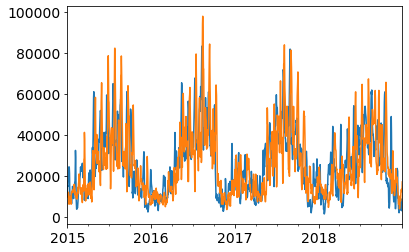

In [27]:
Vic_to_SoG = pd.concat([Vic_to_SoG_2015, Vic_to_SoG_2016, Vic_to_SoG_2017, Vic_to_SoG_2018])
SoG_from_Vic = pd.concat([SoG_from_Vic_2015, SoG_from_Vic_2016, SoG_from_Vic_2017, SoG_from_Vic_2018])
Vic_to_SoG.transport.plot()
SoG_from_Vic.transport.plot();

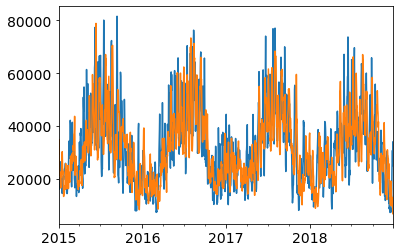

In [28]:
SoG_to_Vic = pd.concat([SoG_to_Vic_2015, SoG_to_Vic_2016, SoG_to_Vic_2017, SoG_to_Vic_2018])
Vic_from_SoG = pd.concat([Vic_from_SoG_2015, Vic_from_SoG_2016, Vic_from_SoG_2017, Vic_from_SoG_2018])
SoG_to_Vic.transport.plot()
Vic_from_SoG.transport.plot();

In [29]:
def correct_time(Vic_to_SoG_2015, basic, factor):
    corrected_time =np.empty_like(np.array(Vic_to_SoG_2015.index))
    for i, index in enumerate(Vic_to_SoG_2015.index):
        corrected_time[i] = index + datetime.timedelta(days=basic+Vic_to_SoG_2015.final_age[i]*factor)
    Vic_to_SoG_2015['correct_time'] = corrected_time
    return (Vic_to_SoG_2015)

In [30]:
def merge(df, df2):
   
    nidx = df.index
    ndf = df.set_index('correct_time')
    ndf.tz_convert('UTC')
    oidx = ndf.index

    step1 = ndf.reindex(oidx.union(nidx))
    step2 = step1.set_index(pd.to_datetime(step1.index, utc='True'))
    step3 = step2.sort_index()
    step4 = step3.interpolate(axis=0)
    res = step4.reindex(nidx)
   
    nidx = df2.index
    ndf2 = df2.set_index('correct_time')
    ndf2.tz_convert('UTC')
    oidx = ndf2.index
    
    step1 = ndf2.reindex(oidx.union(nidx))
    step2 = step1.set_index(pd.to_datetime(step1.index, utc='True'))
    step3 = step2.sort_index()
    step4 = step3.interpolate(axis=0)
    res2 = step4.reindex(nidx)
    
    corr = (res.transport.corr(res2.transport))
    return res, res2, 0.5*(res.transport + res2.transport), corr


## Shallow Flux ##

In [31]:
corr = np.zeros((21, 21))
for j, factor in enumerate(np.arange(0., 1.0, 0.05)):
    cb = 3 - 21/1.9*factor
    for i, basic in enumerate(cb+np.arange(0.3-0.4, 0.3+0.4, 0.04)):
        df1 = correct_time(Vic_from_SoG, basic=-basic, factor=-factor)
        df2 = correct_time(SoG_to_Vic, basic=basic, factor=factor)
        fluxfrom, fluxto, shallow_flux, corr[i,j] = merge(df1, df2)
        if corr[i,j] > 0.726:
            print (basic, factor, corr[i, j])

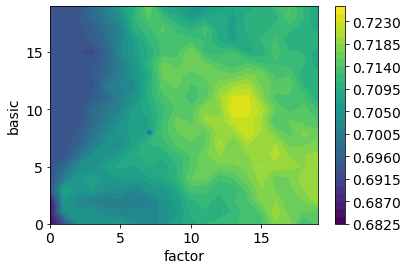

In [32]:
# Shallow
plt.contourf(corr[:20, :20], 30)
plt.colorbar()
plt.xlabel('factor')
plt.ylabel('basic')
plt.plot(7, 8, '*');

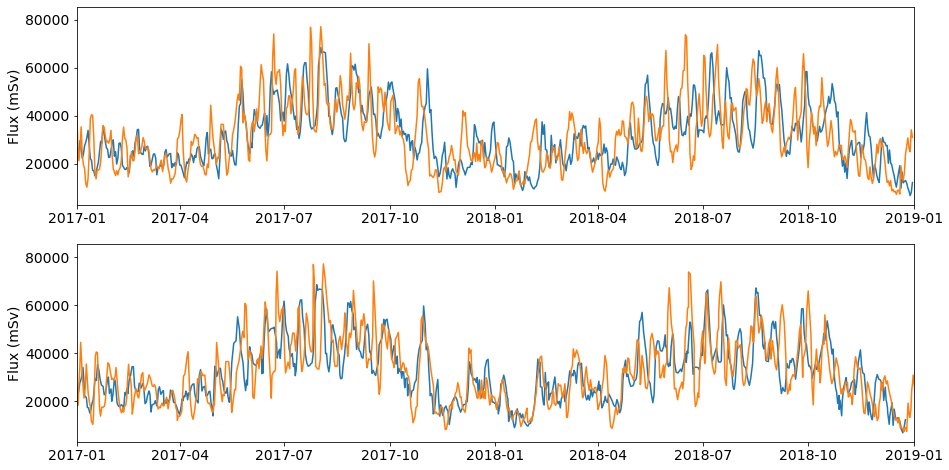

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
basic, factor = -4.125, 0.67
SoG_to_Vic_corr = correct_time(SoG_to_Vic, basic=basic, factor=factor)
Vic_from_SoG_corr = correct_time(Vic_from_SoG, basic=-basic, factor=-factor)
axs[0].plot(Vic_from_SoG_corr.index, Vic_from_SoG_corr.transport)
axs[1].plot(Vic_from_SoG_corr.correct_time, Vic_from_SoG_corr.transport)
axs[0].plot(SoG_to_Vic_corr.index, SoG_to_Vic_corr.transport)
axs[1].plot(SoG_to_Vic_corr.correct_time, SoG_to_Vic_corr.transport)
for axi in axs:
    axi.set_ylabel('Flux (mSv)')
    axi.set_xlim(datetime.datetime(2017, 1, 1), datetime.datetime(2019, 1, 1));

2015-01-01 00:00:00+00:00             NaN
2015-01-02 00:00:00+00:00             NaN
2015-01-03 00:00:00+00:00             NaN
2015-01-04 00:00:00+00:00             NaN
2015-01-05 00:00:00+00:00             NaN
                                 ...     
2018-12-27 00:00:00+00:00    12630.883591
2018-12-28 00:00:00+00:00    14271.553046
2018-12-29 00:00:00+00:00    13381.229648
2018-12-30 00:00:00+00:00    16173.757165
2018-12-31 00:00:00+00:00    18926.604001
Name: transport, Length: 1461, dtype: float64


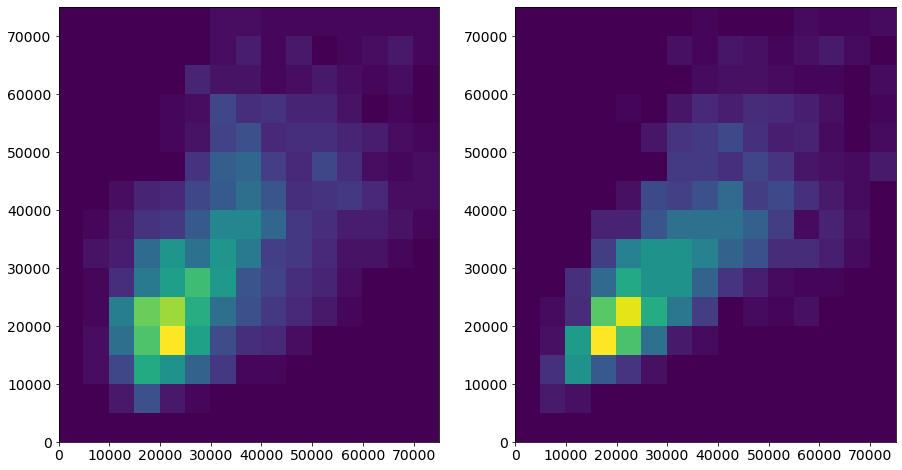

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
basic, factor = -4.125, 0.67
SoG_to_Vic_corr = correct_time(SoG_to_Vic, basic=basic, factor=factor)
Vic_from_SoG_corr = correct_time(Vic_from_SoG, basic=-basic, factor=-factor)
res, res2, shallow_flux, corr = merge(SoG_to_Vic_corr, Vic_from_SoG_corr)
axs[0].hist2d(Vic_from_SoG.transport, SoG_to_Vic.transport, np.arange(0, 80000, 5000));
axs[1].hist2d(res.transport, res2.transport, np.arange(0, 80000, 5000));
print (shallow_flux)

## Deep Fluxes ##

In [35]:
corr = np.zeros((21, 21))
for j, factor in enumerate(np.arange(0.6+0.1, 0.6+0.4+0.1, 0.02)):
    cb = 3 - 21/1.9*factor
    for i, basic in enumerate(cb+np.arange(-2.1-0.2, -2.1+0.2, 0.02)):
        df1 = correct_time(SoG_from_Vic, basic=-basic, factor=-factor)
        df2 = correct_time(Vic_to_SoG, basic=basic, factor=factor)
        fluxfrom, fluxto, deep_flux, corr[i,j] = merge(df1, df2)
        if corr[i,j] > 0.861:
            print (i, j, basic, factor, corr[i, j])

12 11 -9.22842105263158 0.9200000000000002 0.8610388849324498
6 12 -9.569473684210527 0.9400000000000002 0.8612420917557269
8 12 -9.529473684210528 0.9400000000000002 0.8614306496085428
5 13 -9.810526315789474 0.9600000000000002 0.8611815408770443
6 13 -9.790526315789474 0.9600000000000002 0.8611637320184424


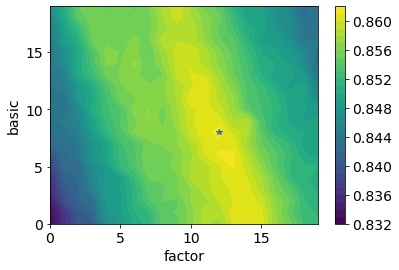

In [36]:
# Deep
plt.contourf(corr[:20, :20], 30)
plt.colorbar()
plt.xlabel('factor')
plt.ylabel('basic')
plt.plot(12, 8, '*');

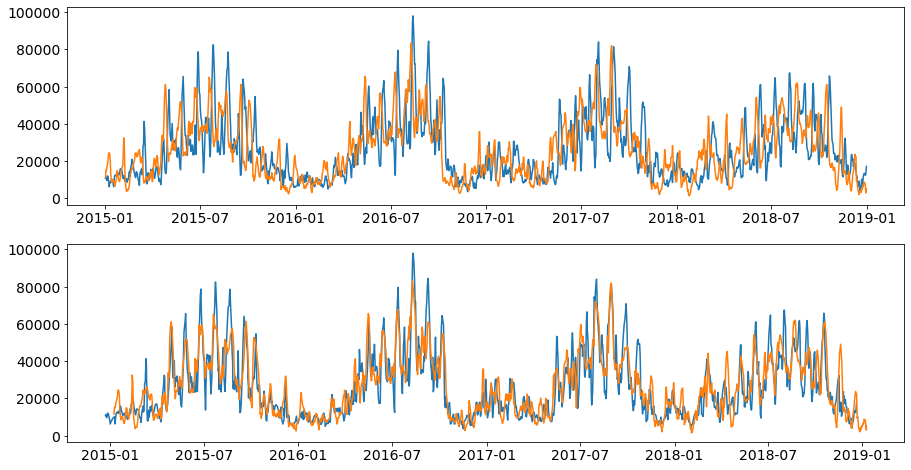

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
basic, factor = -9.53, 0.94
Vic_to_SoG_corr = correct_time(Vic_to_SoG, basic=basic, factor=factor)
SoG_from_Vic_corr = correct_time(SoG_from_Vic, basic=-basic, factor=-factor)
axs[0].plot(SoG_from_Vic_corr.index, SoG_from_Vic_corr.transport)
axs[1].plot(SoG_from_Vic_corr.correct_time, SoG_from_Vic_corr.transport)
axs[0].plot(Vic_to_SoG_corr.index, Vic_to_SoG_corr.transport)
axs[1].plot(Vic_to_SoG_corr.correct_time, Vic_to_SoG_corr.transport);

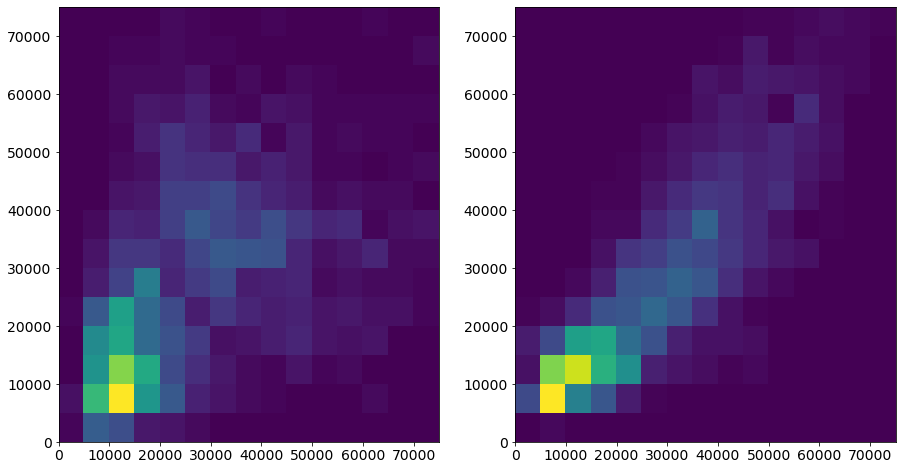

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

res, res2, deep_flux, corr = merge(Vic_to_SoG_corr, SoG_from_Vic_corr)
axs[0].hist2d(SoG_from_Vic.transport, Vic_to_SoG.transport, np.arange(0, 80000, 5000));
axs[1].hist2d(res.transport, res2.transport, np.arange(0, 80000, 5000));

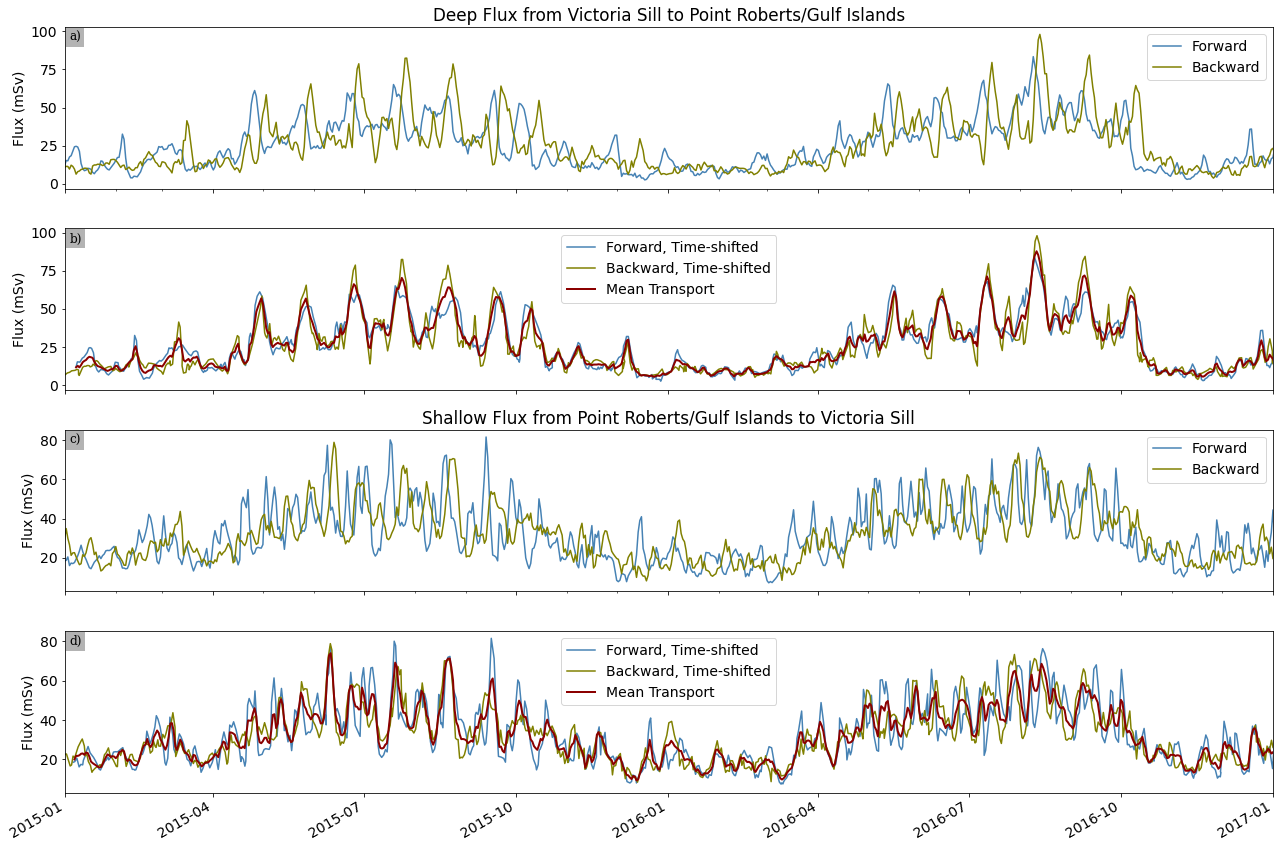

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(18, 12))

mylabels = ['a)', 'b)', 'c)', 'd)']

ax[0].set_title("Deep Flux from Victoria Sill to Point Roberts/Gulf Islands")
(Vic_to_SoG.transport/1000.).plot(ax=ax[0], label='Forward', color='steelblue')
(SoG_from_Vic.transport/1000.).plot(ax=ax[0], label='Backward', color='olive')

ax[1].plot(Vic_to_SoG.correct_time, Vic_to_SoG.transport/1000., color='steelblue', label='Forward, Time-shifted')
ax[1].plot(SoG_from_Vic.correct_time, SoG_from_Vic.transport/1000., color='olive', label='Backward, Time-shifted')
(deep_flux/1000.).plot(ax=ax[1], color='darkred', linewidth=2, label='Mean Transport')


ax[2].set_title("Shallow Flux from Point Roberts/Gulf Islands to Victoria Sill")
(SoG_to_Vic.transport/1000.).plot(ax=ax[2], label='Forward', color='steelblue')
(Vic_from_SoG.transport/1000.).plot(ax=ax[2], label='Backward', color='olive')


ax[3].plot(SoG_to_Vic.correct_time, SoG_to_Vic.transport/1000., color='steelblue', label='Forward, Time-shifted')
ax[3].plot(Vic_from_SoG.correct_time, Vic_from_SoG.transport/1000., color='olive', label='Backward, Time-shifted')
(shallow_flux/1000.).plot(ax=ax[3], color='darkred', linewidth=2, label='Mean Transport')


for j, axi in enumerate(ax):
    axi.set_ylabel('Flux (mSv)')
    axi.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2017, 1, 1))
    axi.legend(loc='best')
    axi.text(0.004, 0.975, mylabels[j], transform=axi.transAxes,
        fontsize=12, verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
        
    
for axi in [ax[0], ax[1], ax[2]]:
    axi.tick_params(
        axis='x', which='both', labelbottom=False)

fig.tight_layout()
fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/transports.pdf')
fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/transports.png')

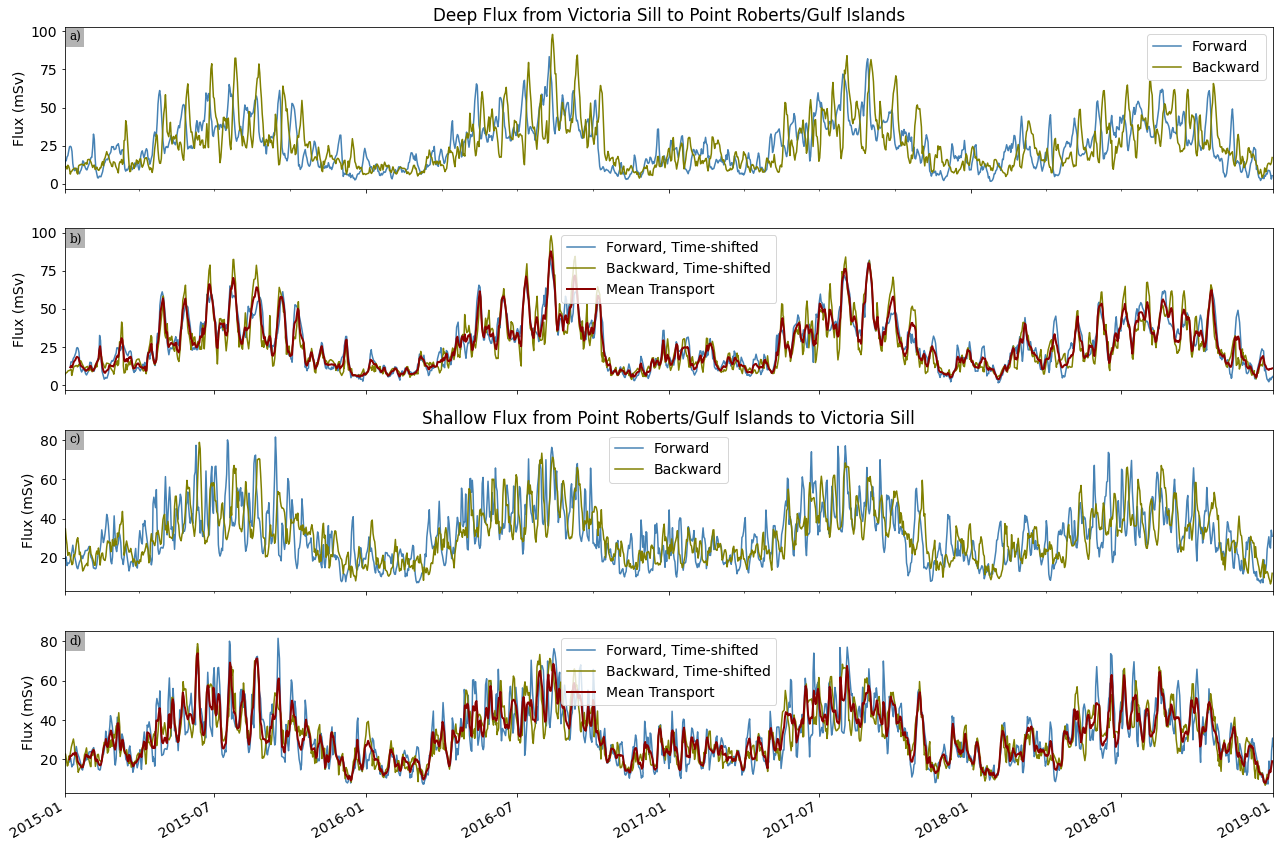

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(18, 12))

mylabels = ['a)', 'b)', 'c)', 'd)']

ax[0].set_title("Deep Flux from Victoria Sill to Point Roberts/Gulf Islands")
(Vic_to_SoG.transport/1000.).plot(ax=ax[0], label='Forward', color='steelblue')
(SoG_from_Vic.transport/1000.).plot(ax=ax[0], label='Backward', color='olive')

ax[1].plot(Vic_to_SoG.correct_time, Vic_to_SoG.transport/1000., color='steelblue', label='Forward, Time-shifted')
ax[1].plot(SoG_from_Vic.correct_time, SoG_from_Vic.transport/1000., color='olive', label='Backward, Time-shifted')
(deep_flux/1000.).plot(ax=ax[1], color='darkred', linewidth=2, label='Mean Transport')


ax[2].set_title("Shallow Flux from Point Roberts/Gulf Islands to Victoria Sill")
(SoG_to_Vic.transport/1000.).plot(ax=ax[2], label='Forward', color='steelblue')
(Vic_from_SoG.transport/1000.).plot(ax=ax[2], label='Backward', color='olive')


ax[3].plot(SoG_to_Vic.correct_time, SoG_to_Vic.transport/1000., color='steelblue', label='Forward, Time-shifted')
ax[3].plot(Vic_from_SoG.correct_time, Vic_from_SoG.transport/1000., color='olive', label='Backward, Time-shifted')
(shallow_flux/1000.).plot(ax=ax[3], color='darkred', linewidth=2, label='Mean Transport')


for j, axi in enumerate(ax):
    axi.set_ylabel('Flux (mSv)')
    axi.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2019, 1, 1))
    axi.legend(loc='best')
    axi.text(0.004, 0.975, mylabels[j], transform=axi.transAxes,
        fontsize=12, verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
    
for axi in [ax[0], ax[1], ax[2]]:
    axi.tick_params(
        axis='x', which='both', labelbottom=False)

fig.tight_layout()
fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/transports_supp.pdf')

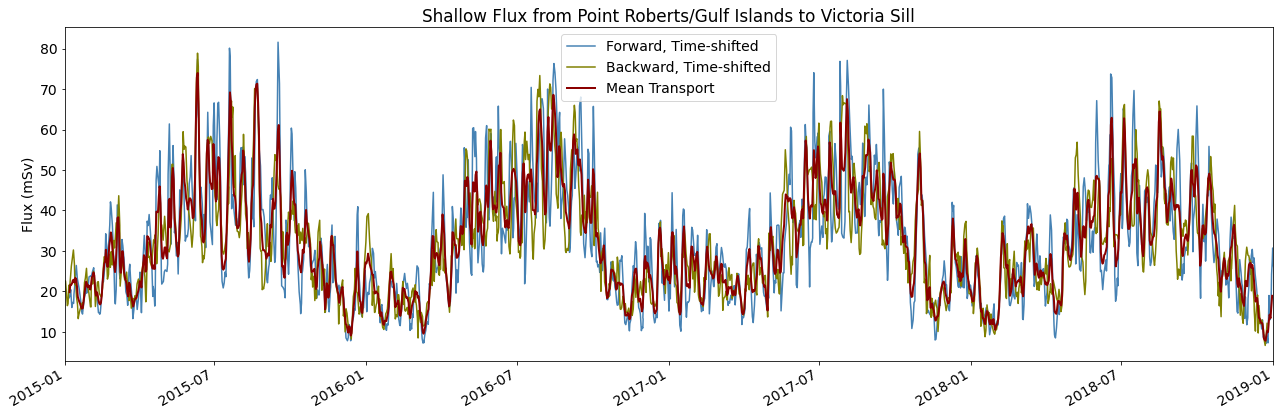

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

ax.plot(SoG_to_Vic.correct_time, SoG_to_Vic.transport/1000., color='steelblue', label='Forward, Time-shifted')
ax.plot(Vic_from_SoG.correct_time, Vic_from_SoG.transport/1000., color='olive', label='Backward, Time-shifted')
(shallow_flux/1000.).plot(ax=ax, color='darkred', linewidth=2, label='Mean Transport')

ax.set_title("Shallow Flux from Point Roberts/Gulf Islands to Victoria Sill")

axi = ax
axi.set_ylabel('Flux (mSv)')
axi.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2019, 1, 1))
axi.legend(loc='best')
    
fig.tight_layout()
#fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/Leblond_surface_transport.png')

In [37]:
shallow_flux.groupby(shallow_flux.index.year).mean()

2015    32392.318331
2016    32543.777124
2017    32652.780719
2018    31006.774288
Name: transport, dtype: float64

In [67]:
SoG_to_Vic.groupby(SoG_to_Vic.index.year)['transport'].mean()

2015    32038.799069
2016    32135.470647
2017    32266.164865
2018    31048.313180
Name: transport, dtype: float64

In [53]:
# years = dates.astype('datetime64[Y]').astype(int) + 1970
SoG_to_Vic['correct_time'].values.astype('datetime64[Y]')

array(['2015', '2015', '2015', ..., '2019', '2019', '2019'],
      dtype='datetime64[Y]')

In [56]:
SoG_to_Vic.groupby(SoG_to_Vic['correct_time'].values.astype('datetime64[Y]'))['transport'].mean()

2015-01-01    32227.691445
2016-01-01    32021.306124
2017-01-01    32339.986496
2018-01-01    30935.053050
2019-01-01    29087.675321
Name: transport, dtype: float64

In [40]:
Vic_from_SoG.groupby(Vic_from_SoG.index.year)['transport'].mean()

2015    32025.479386
2016    31888.403282
2017    32185.080640
2018    30778.107869
Name: transport, dtype: float64

In [68]:
Vic_from_SoG.groupby(Vic_from_SoG['correct_time'].values.astype('datetime64[Y]'))['transport'].mean()

2014-01-01    28405.678320
2015-01-01    31898.164635
2016-01-01    31985.624769
2017-01-01    32134.132405
2018-01-01    30892.785719
Name: transport, dtype: float64

## Depths ##

In [75]:
print ('to PR', 0.5*SoG_to_Vic.init_depth.mean()
       + 0.5*SoG_to_Vic.final_depth.mean())
print ('to PR', SoG_to_Vic.init_depth.mean(),
       SoG_to_Vic.final_depth.mean())
print ('to VS', 0.5*Vic_to_SoG.init_depth.mean()
       + 0.5*Vic_to_SoG.final_depth.mean())

to PR -25.45401674860454
to PR -27.991434754437115 -22.916598742771967
to VS -74.33885697956711


## Calculation of Tides moved to "Calculate Tides" ##
Here just read them

<AxesSubplot:xlabel='time_counter'>

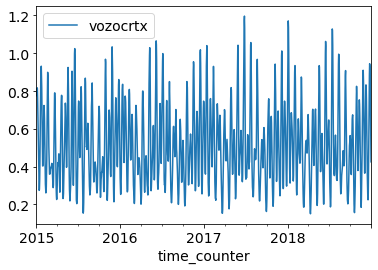

In [76]:
low_pass_tide = pd.read_csv('low_pass_tide.csv', index_col=0)
low_pass_tide.index = pd.to_datetime(low_pass_tide.index, format="%Y-%m-%d")
low_pass_tide.plot()

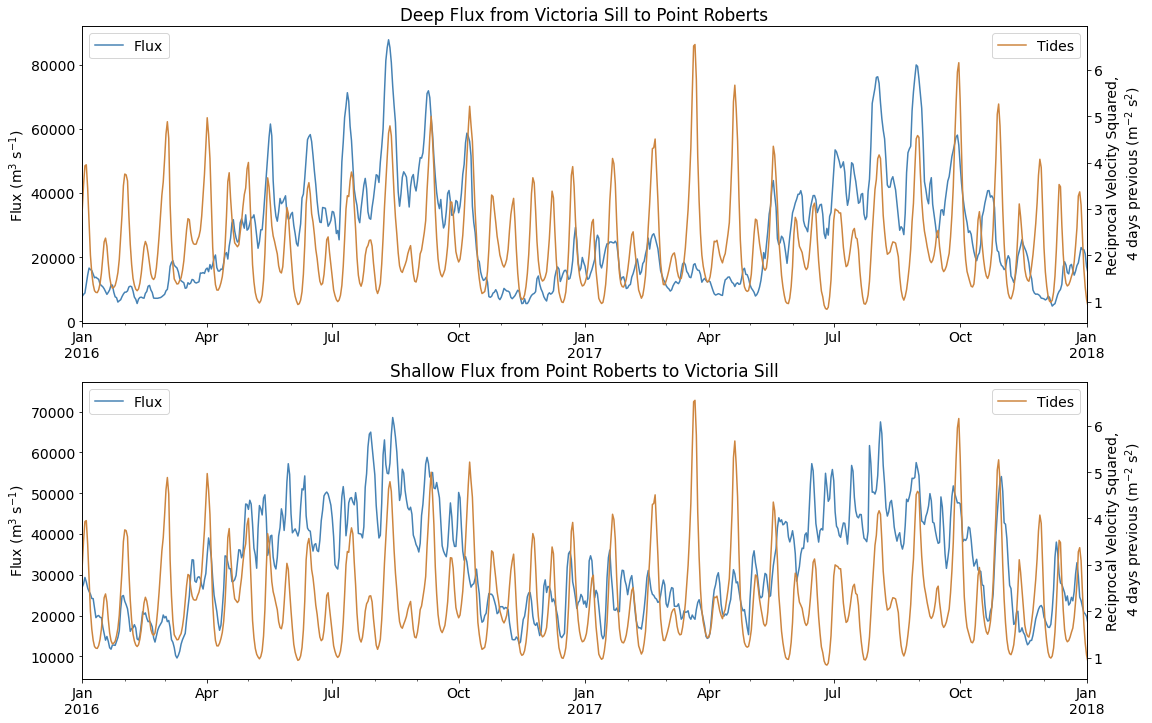

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
ax[0].set_title("Deep Flux from Victoria Sill to Point Roberts")
deep_flux.plot(ax=ax[0], y='transport', label="Flux", color='steelblue')
ax[1].set_title("Shallow Flux from Point Roberts to Victoria Sill")
shallow_flux.plot(ax=ax[1], y='transport', label="Flux", color='steelblue')
for ax in [ax[0], ax[1]]:
    ax2 = ax.twinx()
    ax.set_ylabel('Flux (m$^3$ s$^{-1}$)')
    (1/low_pass_tide.shift(0)).plot(ax=ax2, y='vozocrtx', color = 'peru', label='Tides')
    ax.set_xlim(datetime.datetime(2016, 1, 1), datetime.datetime(2018, 1, 1))
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('Reciprocal Velocity Squared,\n 4 days previous (m$^{-2}$ s$^{2}$)')

# Impact of Density Difference #

In [78]:
sigma = pd.read_csv('sigma_2015_201806.csv', index_col=0)
m2015 = sigma.south - sigma.north
m2015.index = pd.to_datetime(m2015.index, format="%Y-%m-%d")

In [79]:
sigma = pd.read_csv('sigma_2016_201806.csv', index_col=0)
m2016 = sigma.south - sigma.north
m2016.index = pd.to_datetime(m2016.index, format="%Y-%m-%d")

In [80]:
sigma = pd.read_csv('sigma_2017_201806.csv', index_col=0)
m2017 = sigma.south - sigma.north
m2017.index = pd.to_datetime(m2017.index, format="%Y-%m-%d")

In [81]:
sigma = pd.read_csv('sigma_2018_201806.csv', index_col=0)
m2018 = sigma.south - sigma.north
m2018.index = pd.to_datetime(m2018.index, format="%Y-%m-%d")

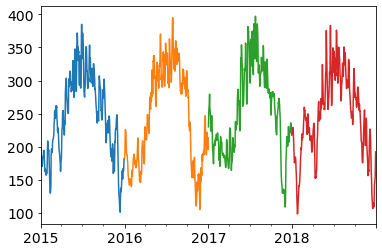

In [82]:
m2015.plot()
m2016.plot()
m2017.plot()
m2018.plot();

In [83]:
goverrho=9.81/1000.
depthwidth = 50*10e3

In [84]:
densitydiff = pd.concat([m2015, m2016, m2017, m2018])
densityforcing = np.sqrt(goverrho*densitydiff[:])

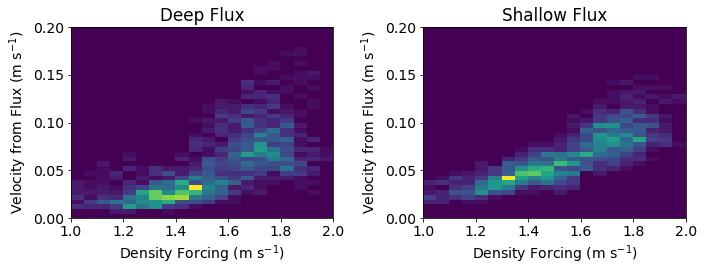

In [85]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[1].hist2d(densityforcing, shallow_flux[:]/depthwidth, range=[[0, 2], [0, 0.2]], bins=40)
axs[0].hist2d(densityforcing, deep_flux[:]/depthwidth, range=[[0, 2], [0, 0.2]], bins=40)
axs[0].set_title("Deep Flux")
axs[1].set_title("Shallow Flux")
for ax in axs:
    ax.set_xlabel('Density Forcing (m s$^{-1}$)')
    ax.set_ylabel('Velocity from Flux (m s$^{-1}$)')
    ax.set_xlim(1, 2)
    ax.set_ylim(0, 0.2)
fig.tight_layout()
fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/density_forcing.pdf')
fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/density_forcing.png')

## River Impact

In [86]:
r2015 = pd.read_csv('SoG_runoff_2015.csv', parse_dates=True, index_col=0)
r2016 = pd.read_csv('SoG_runoff_2016.csv', index_col=0, parse_dates=True)
r2017 = pd.read_csv('SoG_runoff_2017.csv', index_col=0, parse_dates=True)
r2018 = pd.read_csv('SoG_runoff_2018.csv', index_col=0, parse_dates=True)
SoGrunoff = pd.concat([r2015, r2016, r2017, r2018])

In [87]:
SoGrunoff.index[0]

Timestamp('2015-01-01 00:00:00+0000', tz='UTC')

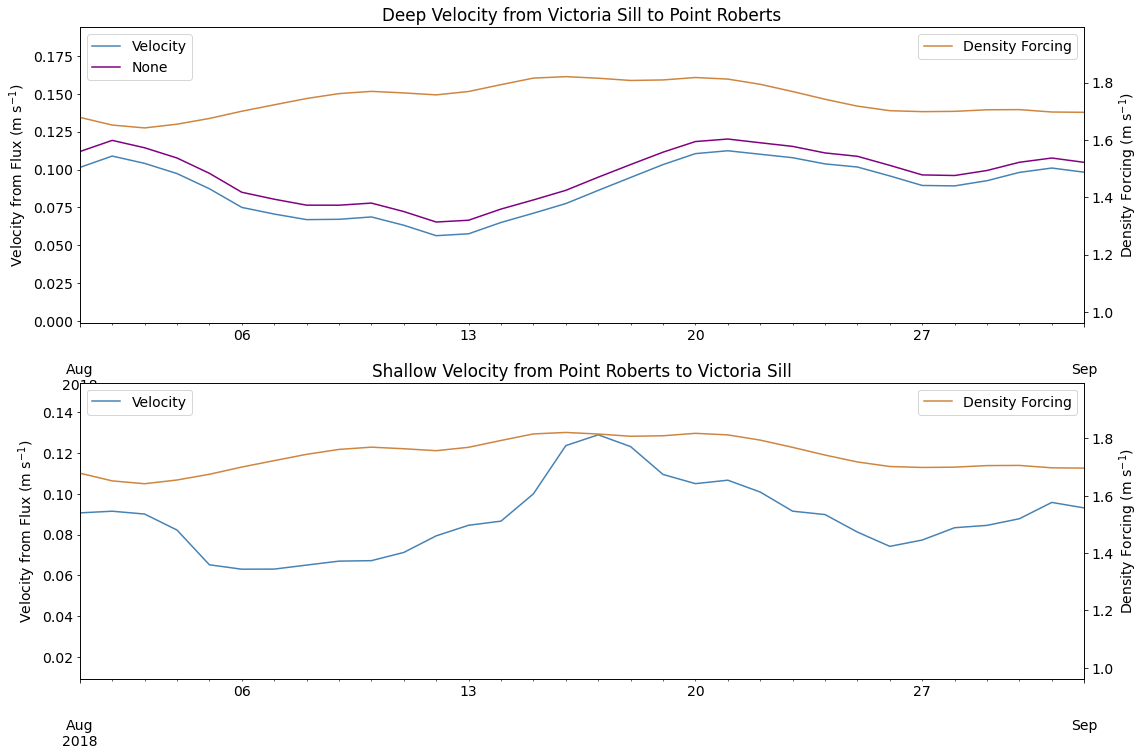

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

ax[0].set_title("Deep Velocity from Victoria Sill to Point Roberts")
(deep_flux/depthwidth).plot(ax=ax[0], y='transport', label="Velocity", color='steelblue')
((deep_flux + SoGrunoff.rorunoff)/depthwidth).plot(ax=ax[0], y='transport', color='purple')

ax[1].set_title("Shallow Velocity from Point Roberts to Victoria Sill")
(shallow_flux/depthwidth).plot(ax=ax[1], y='transport', label="Velocity", color='steelblue')

for ax in [ax[0], ax[1]]:
    ax2 = ax.twinx()
    ax.set_ylabel('Velocity from Flux (m s$^{-1}$)')
    density_line = densityforcing.rolling(window=4, center=True).mean().plot(
        ax=ax2, label='Density Forcing',  color = 'peru')
    ax.set_xlim(datetime.datetime(2018, 8, 1), datetime.datetime(2018, 9, 1))
    ax2.set_ylabel('Density Forcing (m s$^{-1}$)')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
#fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/density_timeseries_supp.pdf')
#fig.savefig('/home/sallen/MEOPAR/estuarine_flux_paper/density_timeseries_supp.png');

sigmaD  transport  withriver
sigmaD     1.000000   0.693597   0.728735
transport  0.693597   1.000000   0.990961
withriver  0.728735   0.990961   1.000000

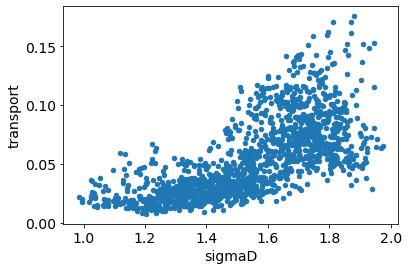

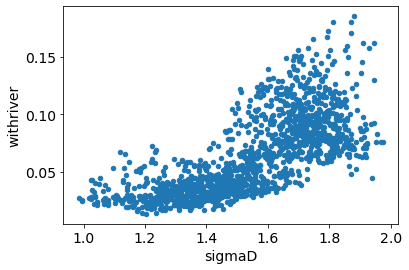

In [90]:
newds = pd.DataFrame({'sigmaD': densityforcing, 'transport': deep_flux/depthwidth, 'withriver': (deep_flux+SoGrunoff.rorunoff)/depthwidth})
newds.plot('sigmaD', 'transport', 'scatter')
newds.plot('sigmaD', 'withriver', 'scatter')
newds.corr()

sigmaD  transport
sigmaD     1.000000   0.822117
transport  0.822117   1.000000

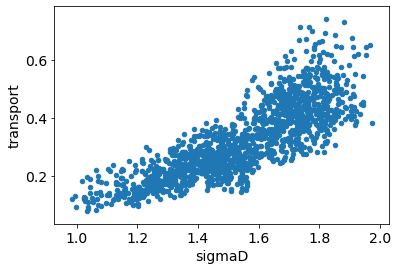

In [99]:
newds = pd.DataFrame({'sigmaD': densityforcing, 'transport': shallow_flux/depthwidth})
newds.plot('sigmaD', 'transport', 'scatter')
newds.corr()

# Non-Dimensional Analysis

In [92]:
print(deep_flux)
print(depthwidth)
print(densityforcing)
print(deep_flux/depthwidth/densityforcing)

2015-01-01 00:00:00+00:00             NaN
2015-01-02 00:00:00+00:00             NaN
2015-01-03 00:00:00+00:00             NaN
2015-01-04 00:00:00+00:00             NaN
2015-01-05 00:00:00+00:00             NaN
                                 ...     
2018-12-27 00:00:00+00:00     9895.343769
2018-12-28 00:00:00+00:00    10533.186998
2018-12-29 00:00:00+00:00    10538.225708
2018-12-30 00:00:00+00:00    10563.115735
2018-12-31 00:00:00+00:00    10896.923571
Name: transport, Length: 1461, dtype: float64
500000.0
2015-01-01 00:00:00+00:00    1.358468
2015-01-02 00:00:00+00:00    1.385026
2015-01-03 00:00:00+00:00    1.389428
2015-01-04 00:00:00+00:00    1.363577
2015-01-05 00:00:00+00:00    1.323961
                               ...   
2018-12-27 00:00:00+00:00    1.193158
2018-12-28 00:00:00+00:00    1.218837
2018-12-29 00:00:00+00:00    1.223386
2018-12-30 00:00:00+00:00    1.312125
2018-12-31 00:00:00+00:00    1.373382
Length: 1461, dtype: float64
2015-01-01 00:00:00+00:00         Na

In [93]:
smooth = densityforcing.rolling(window=4, center=True).mean()
smooth.index = smooth.index.tz_convert(None)
myfroude = low_pass_tide.vozocrtx/smooth**2
print(myfroude)

time_counter
2015-01-01         NaN
2015-01-02         NaN
2015-01-03    0.410687
2015-01-04    0.438188
2015-01-05    0.451745
                ...   
2018-12-27    0.571410
2018-12-28    0.460165
2018-12-29    0.351540
2018-12-30    0.258762
2018-12-31         NaN
Length: 1461, dtype: float64


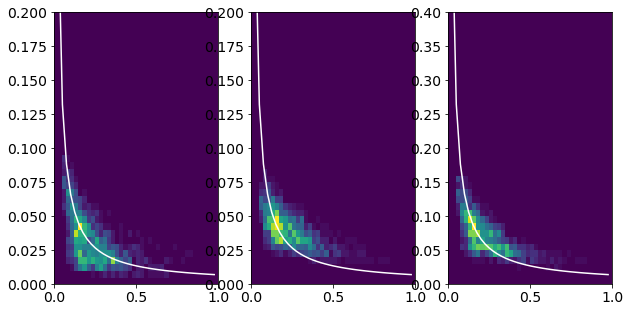

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].hist2d(myfroude, deep_flux/depthwidth/densityforcing,range=[[0, 1], [0, 0.2]], bins=40);
axs[0].plot(np.arange(1/40, 1, 1/40), 0.033/5/np.arange(1/40, 1, 1/40), 'w');
axs[1].hist2d(myfroude, shallow_flux/depthwidth/densityforcing,range=[[0, 1], [0, 0.2]], bins=40);
axs[1].plot(np.arange(1/40, 1, 1/40), 0.033/5/np.arange(1/40, 1, 1/40), 'w');
axs[2].hist2d(myfroude, (deep_flux+shallow_flux)/depthwidth/densityforcing, range=[[0, 1], [0, 0.4]], bins=40);
axs[2].plot(np.arange(1/40, 1, 1/40), 2*0.033/5/np.arange(1/40, 1, 1/40), 'w');

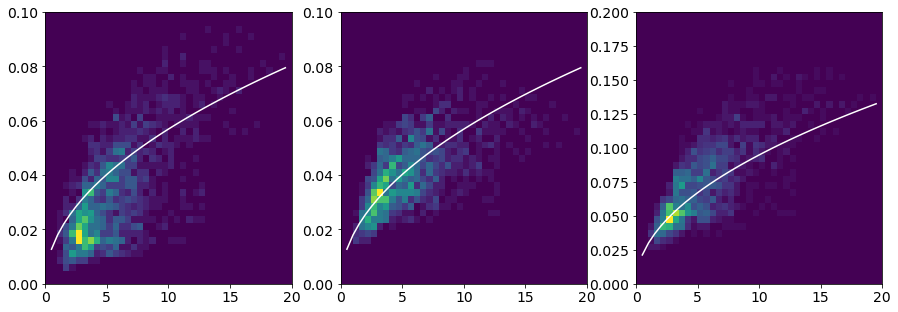

In [132]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist2d(1/myfroude, deep_flux/depthwidth/densityforcing,range=[[0, 20], [0, 0.1]], bins=40);
axs[0].plot(np.arange(20/40, 20, 20/40), 0.09/5*np.arange(20/40, 20, 20/40)**0.5, 'w');
axs[1].hist2d(1/myfroude, shallow_flux/depthwidth/densityforcing,range=[[0, 20], [0, 0.1]], bins=40);
axs[1].plot(np.arange(20/40, 20, 20/40), 0.09/5*np.arange(20/40, 20, 20/40)**0.5, 'w');
axs[2].hist2d(1/myfroude, (deep_flux+shallow_flux)/depthwidth/densityforcing,range=[[0, 20], [0, 0.2]], bins=40);
axs[2].plot(np.arange(20/40, 20, 20/40), 2*0.075/5*np.arange(20/40, 20, 20/40)**0.5, 'w');

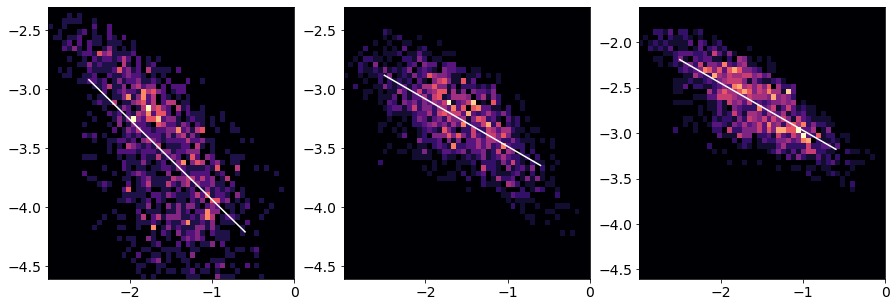

In [137]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist2d(np.log(myfroude), np.log(deep_flux/depthwidth/densityforcing), range=[[np.log(0.05), np.log(1)],
                                                                                   [np.log(0.01), np.log(0.1)]], bins=50, cmap='magma');
axs[1].hist2d(np.log(myfroude), np.log(shallow_flux/depthwidth/densityforcing), range=[[np.log(0.05), np.log(1)],
                                                                                   [np.log(0.01), np.log(0.1)]], bins=50, cmap='magma');
axs[2].hist2d(np.log(myfroude), np.log((deep_flux+shallow_flux)/depthwidth/densityforcing), range=[[np.log(0.05), np.log(1)],
                                                                                   [np.log(0.01), np.log(0.2)]], bins=50, cmap='magma');
axs[0].plot(np.arange(-2.5, -0.5, 0.1), -4.6144-0.6781*np.arange(-2.5, -0.5, 0.1), 'w-');
axs[1].plot(np.arange(-2.5, -0.5, 0.1), -3.8856 -0.4019*np.arange(-2.5, -0.5, 0.1), 'w-');
axs[2].plot(np.arange(-2.5, -0.5, 0.1), -3.49 -0.52*np.arange(-2.5, -0.5, 0.1), 'w-');

In [123]:
y = np.log(deep_flux/depthwidth/densityforcing).values
print (y)
x = np.log(myfroude)
x = sm.add_constant(x)
model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[        nan         nan         nan ... -4.06122103 -4.12888744
 -4.1434037 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1009.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          1.58e-168
Time:                        15:22:44   Log-Likelihood:                -775.27
No. Observations:                1453   AIC:                             1555.
Df Residuals:                    1451   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6155      0.036   -129.794      0.000      -4.685      -4.546
0             -0.6781      0.021    -31.763      0.000      -0.720      -0.636
==============================================================================
Omnibus:                       71.335   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.010
Skew:                          -0.549   Prob(JB):                     1.15e-17
Kurtosis:                       2.711   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
y = np.log(shallow_flux/depthwidth/densityforcing).values
print (y)
x = np.log(myfroude)
x = sm.add_constant(x)
model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[        nan         nan         nan ... -3.82237727 -3.70286573
 -3.59131566]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     1207.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          5.24e-193
Time:                        15:13:59   Log-Likelihood:                 114.14
No. Observations:                1454   AIC:                            -224.3
Df Residuals:                    1452   BIC:                            -213.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8856      0.019   -201.694      0.000      -3.923      -3.848
0             -0.4019      0.012    -34.744      0.000      -0.425      -0.379
==============================================================================
Omnibus:                       14.482   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.121
Skew:                          -0.153   Prob(JB):                      0.00233
Kurtosis:                       2.674   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
y = np.log((deep_flux+shallow_flux)/depthwidth/densityforcing).values
print (y)
x = np.log(myfroude)
x = sm.add_constant(x)
model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[        nan         nan         nan ... -3.24153806 -3.20021211
 -3.13658661]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1867.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          6.56e-263
Time:                        15:33:28   Log-Likelihood:                 58.764
No. Observations:                1453   AIC:                            -113.5
Df Residuals:                    1451   BIC:                            -103.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4903      0.020   -174.255      0.000      -3.530      -3.451
0             -0.5196      0.012    -43.212      0.000      -0.543      -0.496
==============================================================================
Omnibus:                       32.053   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.855
Skew:                          -0.374   Prob(JB):                     4.45e-08
Kurtosis:                       2.975   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
y = ((deep_flux+shallow_flux)/depthwidth/densityforcing).values
print (y)
x = np.sqrt(1/myfroude)
model11 = sm.OLS(y, x, missing='drop').fit()
model11.summary()

[       nan        nan        nan ... 0.0391037  0.04075356 0.04343079]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.801e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:51:00   Log-Likelihood:                          3822.3
No. Observations:                1453   AIC:                                     -7643.
Df Residuals:                    1452   BIC:                                     -7637.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0325      0.000    167.368      0.000       0.032       0.033
==============================================================================
Omnibus:                        7.775   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                9.217
Skew:                           0.086   Prob(JB):                      0.00996
Kurtosis:                       3.351   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

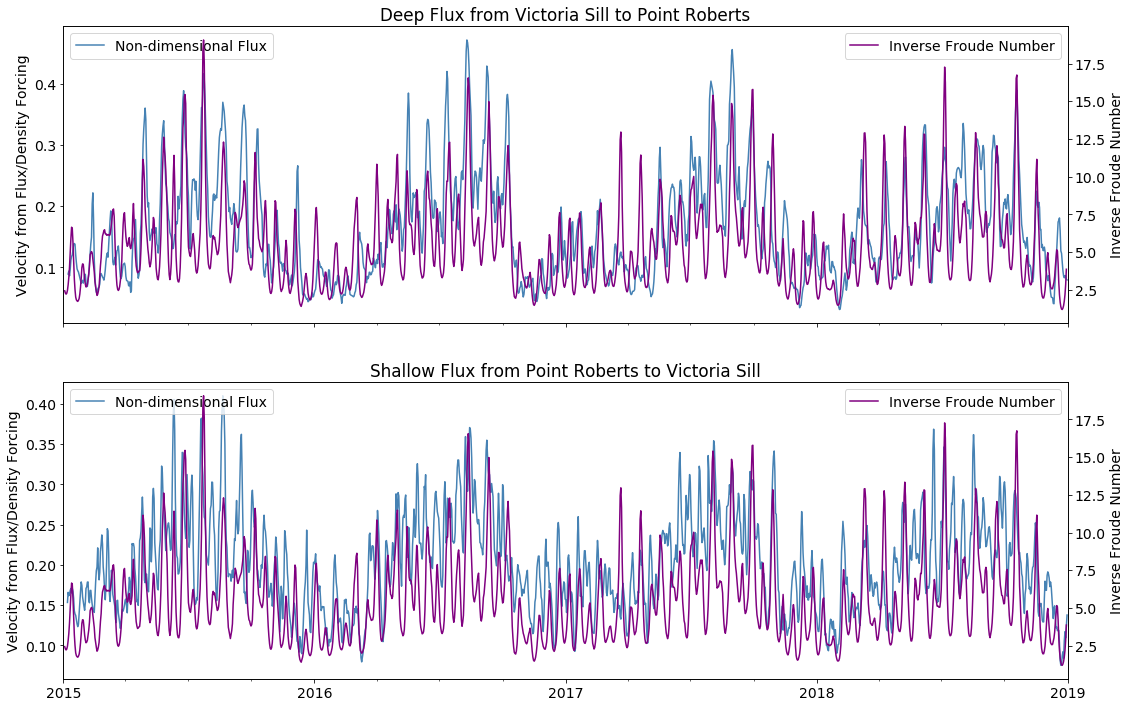

In [117]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

ax[0].set_title("Deep Flux from Victoria Sill to Point Roberts")
(deep_flux/depthwidth/densityforcing).plot(ax=ax[0], label="Non-dimensional Flux", color='steelblue')

ax[1].set_title("Shallow Flux from Point Roberts to Victoria Sill")
(shallow_flux/depthwidth/densityforcing).plot(ax=ax[1], label="Non-dimensional Flux", color='steelblue')

for ax in [ax[0], ax[1]]:
    ax2 = ax.twinx()
    ax.set_ylabel('Velocity from Flux/Density Forcing')
    (1/myfroude).plot(ax=ax2, color = 'purple', label='Inverse Froude Number')
    ax.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2019, 1, 1))
    ax2.set_ylabel('Inverse Froude Number')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')


<AxesSubplot:title={'center':'Baroclinic Velocity'}, xlabel='time_counter'>

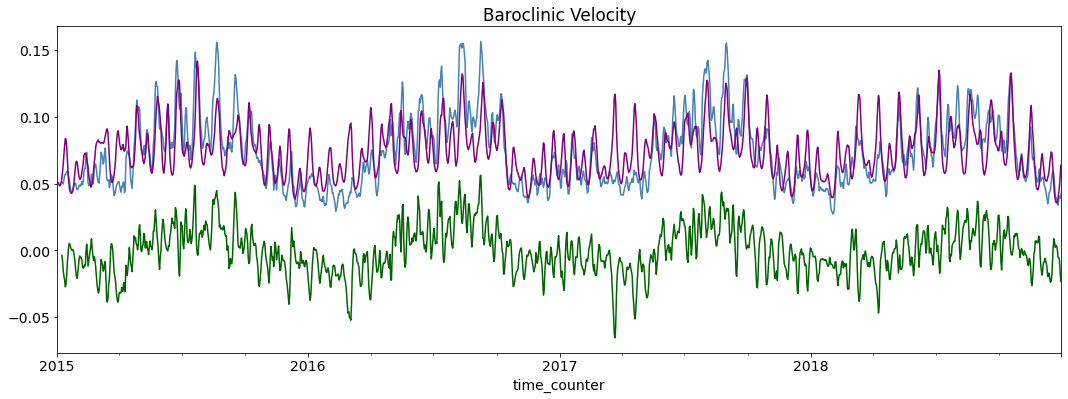

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

ax.set_title("Baroclinic Velocity")
((deep_flux+shallow_flux)/depthwidth/densityforcing).plot(ax=ax, label="Non-dimensional Flux", color='steelblue')

(0.0325*np.sqrt(1/myfroude)).plot(color='purple');

((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values).plot(color='darkgreen')

In [144]:
for ax in [ax[0], ax[1]]:
    ax2 = ax.twinx()
    ax.set_ylabel('Velocity from Flux/Density Forcing')
    (1/myfroude).plot(ax=ax2, color = 'purple', label='Inverse Froude Number')
    ax.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2019, 1, 1))
    ax2.set_ylabel('Inverse Froude Number')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

SyntaxError: invalid syntax (<ipython-input-144-8e12c9e144a6>, line 8)

# Wind #

In [265]:
wind = pd.read_csv('day_avg_wind.csv', index_col=0)
wind.index = pd.to_datetime(wind.index, format="%Y-%m-%d")
#low_pass_wind = pd.rolling_mean(day_avg_wind_pd, 4, center=True)

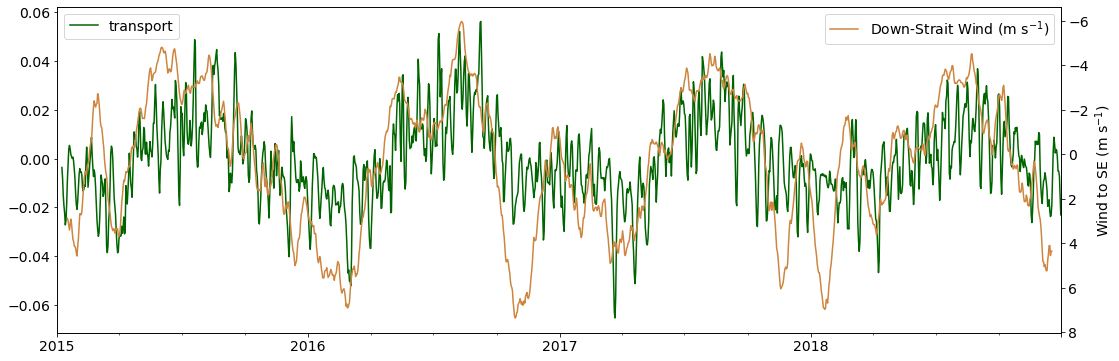

In [266]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values).plot(color='darkgreen')

ax2 = ax.twinx()
wind.rolling(window=30, center=True).mean().plot(ax=ax2, y='wind', legend=False, label='Down-Strait Wind (m s$^{-1}$)',  color = 'peru')
#wind.plot(ax=ax2, y='wind', legend=False, label='Down-Strait Wind (m s$^{-1}$)',  color = 'peru')
ax2.set_ylabel('Wind to SE (m s$^{-1}$)')
ax2.invert_yaxis()
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

7 30           residual     wind    model
residual   1.00000 -0.60786  0.60786
wind      -0.60786  1.00000 -1.00000
model      0.60786 -1.00000  1.00000
0.013919434051860805


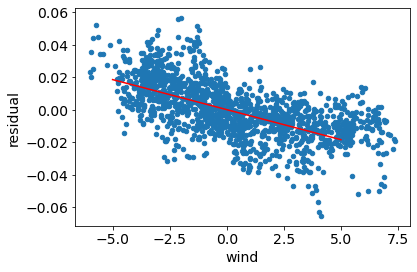

In [404]:
window=30   
wroll = wind.rolling(window=window, center=True).mean().wind.values
newds2 = pd.DataFrame({'residual': (((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values)), 
                       'wind': wroll,
                      'model': -0.0037*wroll})
newds2.plot('wind', 'residual', 'scatter')
plt.plot([-5, 5], [0.0037*5, -0.0037*5], 'r-')
print (lag, window, newds2.corr())
print (np.sqrt(((newds2.residual - newds2.model)**2).mean()))

In [269]:
w_setup = 0.002 * 1.2 / 1000. * wind.wind * np.abs(wind.wind) / (0.02 * 50) * 100e3/50

In [270]:
print (w_setup.mean())

0.02872183142474078


In [274]:
print (w_setup.rolling(window=30).mean())

time
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
                ...   
2018-12-27    0.218080
2018-12-28    0.217489
2018-12-29    0.234026
2018-12-30    0.231634
2018-12-31    0.230675
Name: wind, Length: 1461, dtype: float64


In [275]:
print (w_setup.rolling(window=30, center=True).mean())

time
2015-01-01   NaN
2015-01-02   NaN
2015-01-03   NaN
2015-01-04   NaN
2015-01-05   NaN
              ..
2018-12-27   NaN
2018-12-28   NaN
2018-12-29   NaN
2018-12-30   NaN
2018-12-31   NaN
Name: wind, Length: 1461, dtype: float64


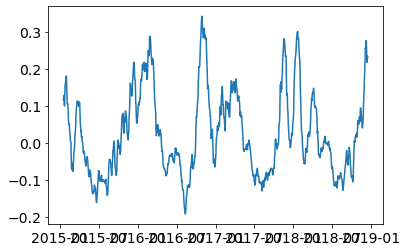

In [706]:
plt.plot(w_setup.rolling(window=30, center=True).mean())

In [281]:
y = (((deep_flux+shallow_flux)/depthwidth).values/(np.sqrt(1/myfroude)).values)
print (y)
x = w_setup.rolling(window=30, center=True).mean()
z = densityforcing.values
X = np.column_stack((x, z))

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

[       nan        nan        nan ... 0.02836408 0.02720137        nan]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.284e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        17:16:08   Log-Likelihood:                          4667.4
No. Observations:                1432   AIC:                                     -9331.
Df Residuals:                    1430   BIC:                                     -9320.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0575      0.002    -27.034      0.000      -0.062      -0.053
x2             0.0339      0.000    213.719      0.000       0.034       0.034
==============================================================================
Omnibus:                       15.330   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.595
Skew:                           0.238   Prob(JB):                     0.000411
Kurtosis:                       3.186   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

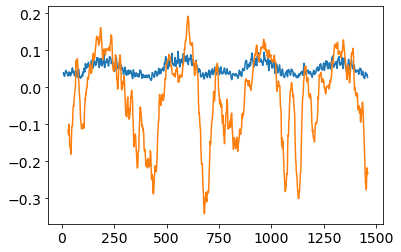

In [282]:
plt.plot(y)
plt.plot(-w_setup.rolling(window=30).mean().values)

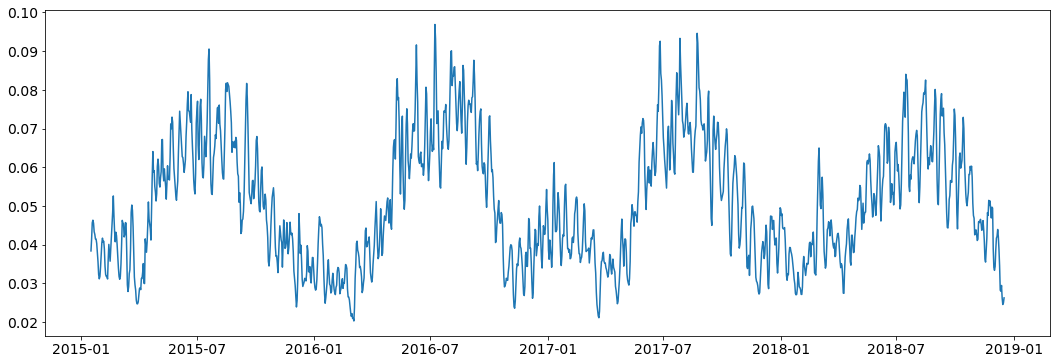

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
plt.plot(y + 0.0037 * x)
#plt.plot(y + 0*x.wind)

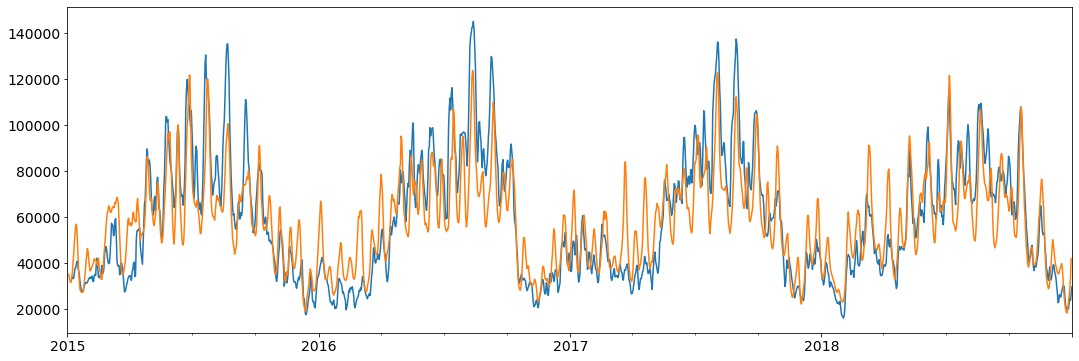

In [284]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
(deep_flux + shallow_flux).plot();
(densityforcing * depthwidth * 0.0325 * np.sqrt(1/myfroude).values).plot();

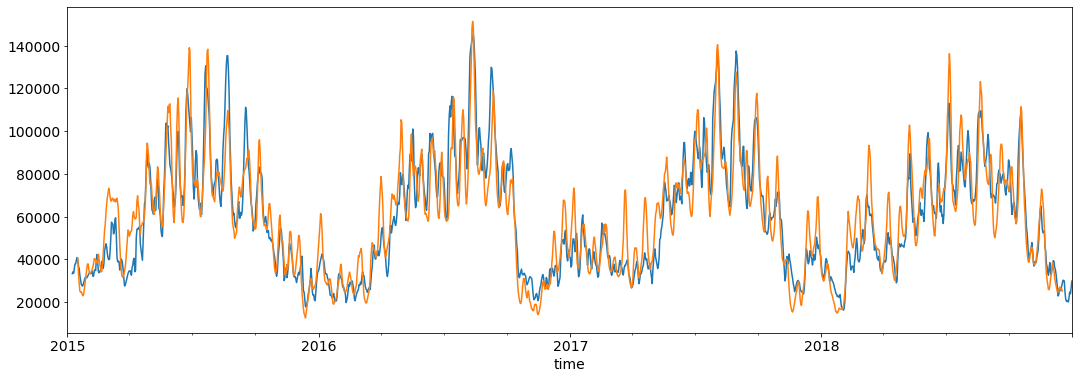

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
(deep_flux + shallow_flux).plot();
((0.0339 * densityforcing.values - 0.0575 * x) * depthwidth * np.sqrt(1/myfroude).values).plot();

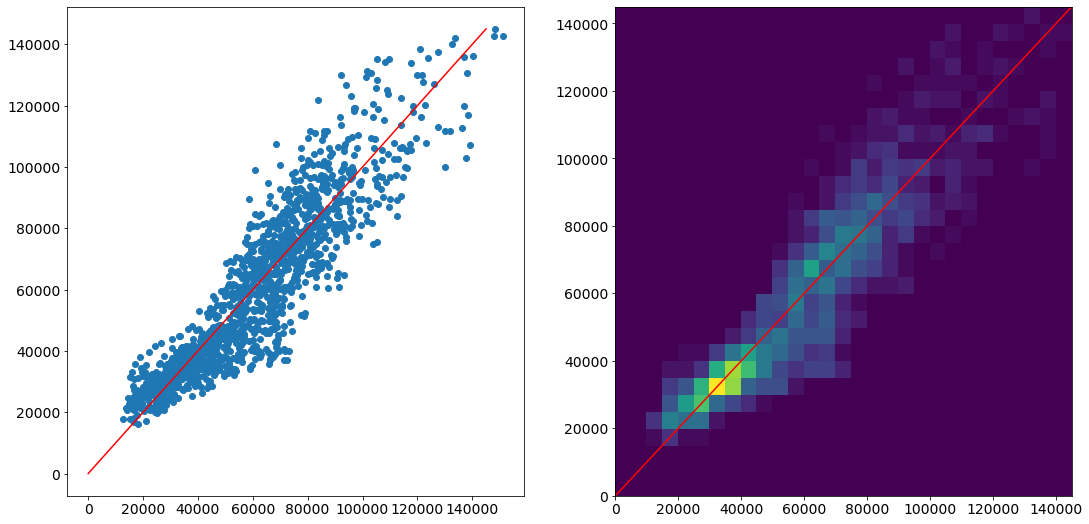

In [293]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].plot(((0.0339 * densityforcing.values - 0.0575 * x) * depthwidth * np.sqrt(1/myfroude).values), deep_flux+shallow_flux, 'o');
axs[1].hist2d(((0.0339 * densityforcing.values - 0.0575 * x) * depthwidth * np.sqrt(1/myfroude).values), deep_flux+shallow_flux, 
              np.arange(0, 150000, 5000));
for ax in axs:
    ax.plot(np.arange(0, 150000, 5000), np.arange(0, 150000, 5000), 'r-')

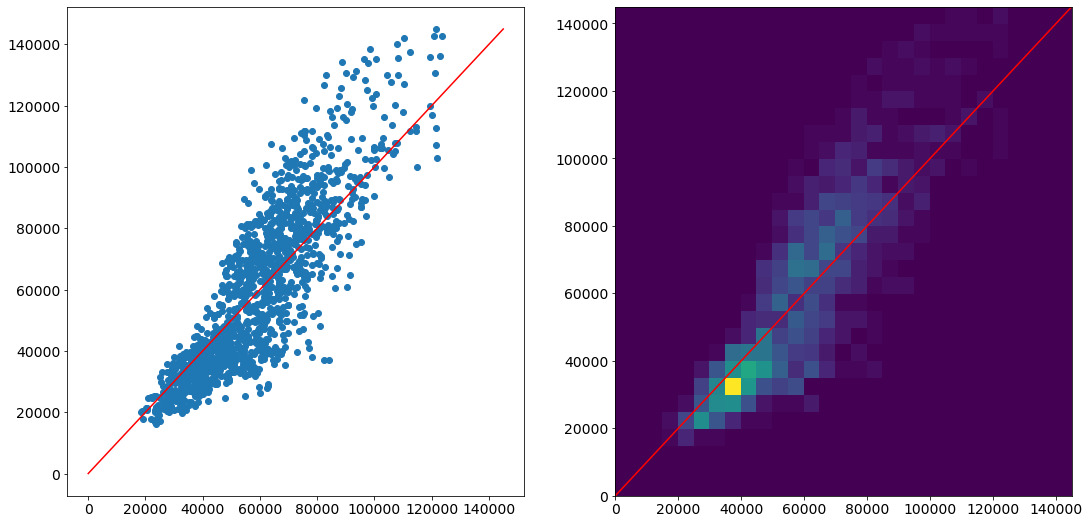

In [294]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].plot(((0.0325 * densityforcing.values) * depthwidth * np.sqrt(1/myfroude).values), deep_flux+shallow_flux, 'o');
axs[1].hist2d(((0.0325 * densityforcing.values) * depthwidth * np.sqrt(1/myfroude).values), deep_flux+shallow_flux, 
              np.arange(0, 150000, 5000));
for ax in axs:
    ax.plot(np.arange(0, 150000, 5000), np.arange(0, 150000, 5000), 'r-')

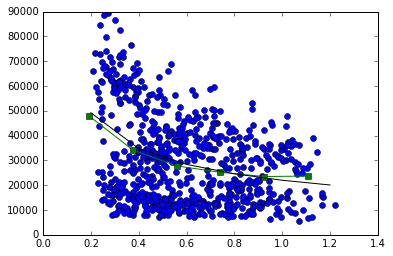

In [516]:
length = 731
newds3 = pd.DataFrame({'sigmaD': newsa[:length], 
                       'wind': wind.wind[:length], 
                       'tides': low_pass_tide.uVelocity[:length], 
                       'ratio' : newsa[:length]/low_pass_tide.uVelocity[:length],
                       'transport': newsb[:length]})
plt.plot(newds3.set_index('tides').transport, 'o')
bins = np.linspace(0.1, 1.2, 7)
plot_centers = (bins [:-1] + bins[1:])/2
group = newds3.groupby(pd.cut(newds3.tides, bins))
plot_values = group.transport.mean()
plt.plot(plot_centers, plot_values, 's-')
#newds3.plot.hexbin('tides', 'transport', gridsize=10)
plt.plot(np.arange(0.2, 1.4, 0.2), 22000./np.sqrt(np.arange(0.2, 1.4, 0.2)), 'k')

In [461]:
newds3.transport[365:370]

time
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
Freq: D, Name: transport, dtype: float64

In [108]:
import statsmodels.api as sm
y = newds3.transport[8:365]
x = newds3[['ratio', 'wind']][8:365]
x = sm.add_constant(x)
model11 = sm.OLS(y, x).fit()
model11.summary()

NameError: name 'newds3' is not defined

In [476]:
y = newds3.transport[8:365]
x = newds3[['ratio']][8:365]
x = sm.add_constant(x)
model11 = sm.OLS(y, x).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              transport   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     436.4
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           9.09e-64
Time:                        17:51:47   Log-Likelihood:                -3827.8
No. Observations:                 357   AIC:                             7660.
Df Residuals:                     355   BIC:                             7667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4844.2635   1329.161      3.645      0.000      2230.244  7458.283
ratio         51.4230      2.462     20.889      0.000        46.582    56.264
==============================================================================
Omnibus:                       16.673   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.359
Skew:                           0.048   Prob(JB):                       0.0252
Kurtosis:                       2.303   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [475]:
y = newds3.transport[8:365]
x = newds3[['sigmaD', 'tides', 'wind']][8:365]
x = sm.add_constant(x)
model11 = sm.OLS(y, x).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              transport   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           2.19e-73
Time:                        17:49:50   Log-Likelihood:                -3799.2
No. Observations:                 357   AIC:                             7606.
Df Residuals:                     353   BIC:                             7622.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3042.1559   2892.291     -1.052      0.294     -8730.445  2646.133
sigmaD       202.1803     10.244     19.737      0.000       182.034   222.327
tides      -2.835e+04   2296.257    -12.344      0.000     -3.29e+04 -2.38e+04
wind         490.2362    115.314      4.251      0.000       263.446   717.026
==============================================================================
Omnibus:                        5.936   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.238
Skew:                           0.226   Prob(JB):                       0.0729
Kurtosis:                       2.615   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

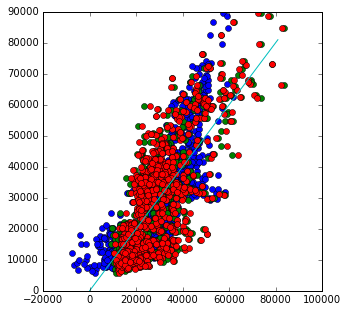

In [477]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(-3042.16+ 202.18*newds3.sigmaD 
         - 2.835e4*newds3.tides 
         + 490.24*newds3.wind, newds3.transport, 'o')
ax.plot(5175.1 + 50.52*newds3.ratio -277.4*newds3.wind, newds3.transport, 'o')
ax.plot(4844.3 + 51.42*newds3.ratio, newds3.transport, 'o')
ax.plot(range(0,90000, 9000), range(0, 90000,9000))

## Barotropic and Baroclinic

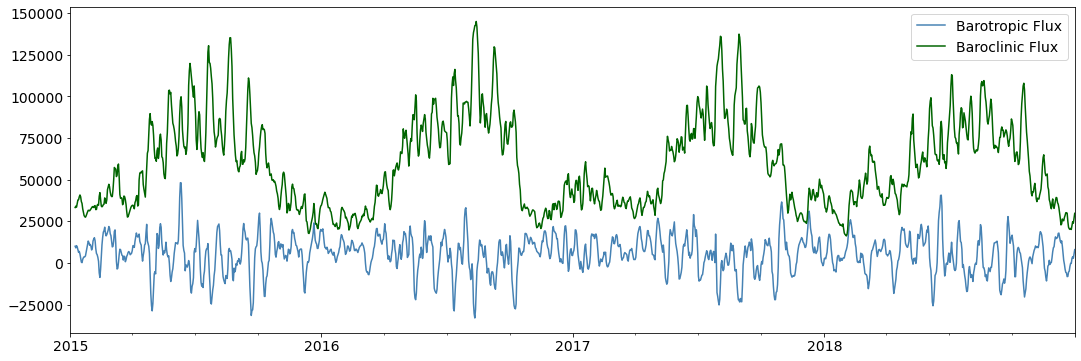

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

(shallow_flux - deep_flux).plot(ax=ax, label="Barotropic Flux", color='steelblue')

(deep_flux+shallow_flux).plot(ax=ax, label="Baroclinic Flux", color='darkgreen')

ax.legend();

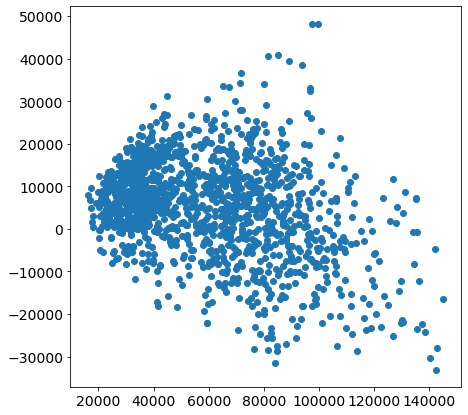

In [338]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(shallow_flux + deep_flux, shallow_flux - deep_flux, 'o');

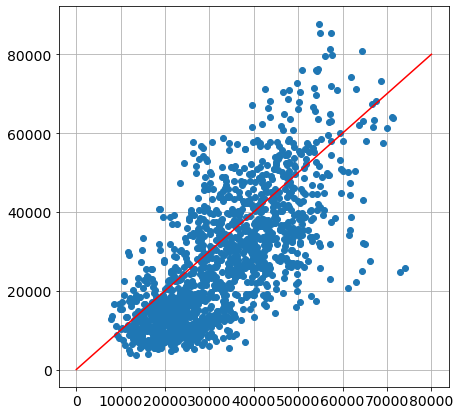

In [340]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(shallow_flux, deep_flux, 'o');
ax.grid();
ax.plot(np.arange(0, 1e5, 20e3), np.arange(0, 1e5, 20e3), '-r')

## Barotropic Flux

5405.832048037188


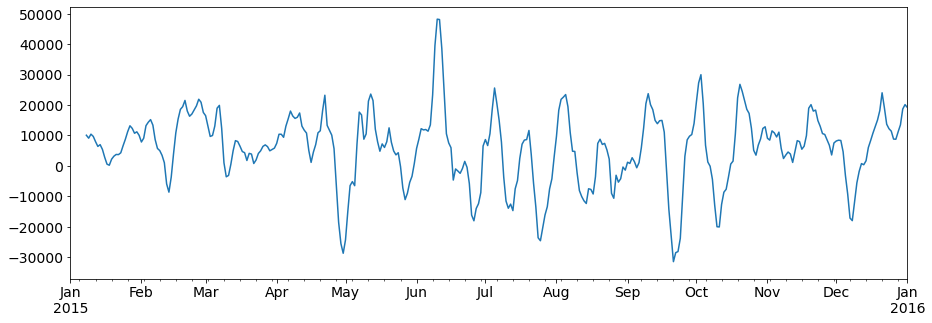

In [332]:
tropic = shallow_flux - deep_flux
print (tropic.mean())
fig, ax= plt.subplots(1, 1, figsize=(15, 5))
tropic.plot(ax=ax)
ax.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2016, 1, 1));

### Wind

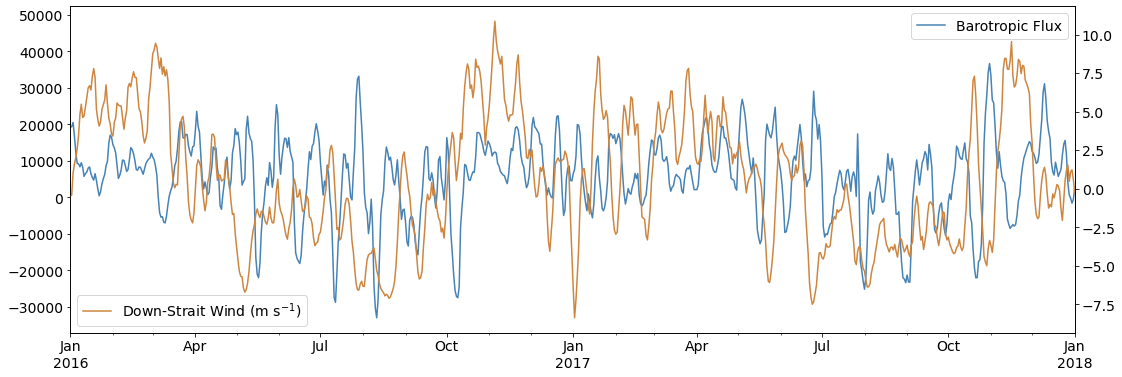

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

tropic.plot(ax=ax, label="Barotropic Flux", color='steelblue')

ax2 = ax.twinx()
wind.rolling(window=7, center=True).mean().plot(ax=ax2, y='wind', legend=False, label='Down-Strait Wind (m s$^{-1}$)',  color = 'peru')

for xa in [ax, ax2]:
    xa.legend();
    xa.set_xlim(datetime.datetime(2016, 1, 1), datetime.datetime(2018, 1, 1))

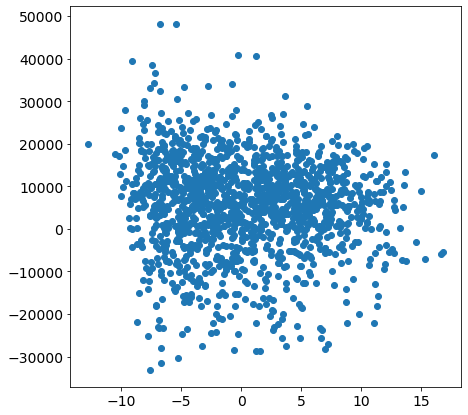

In [328]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(wind.wind, tropic, 'o');

### Tides

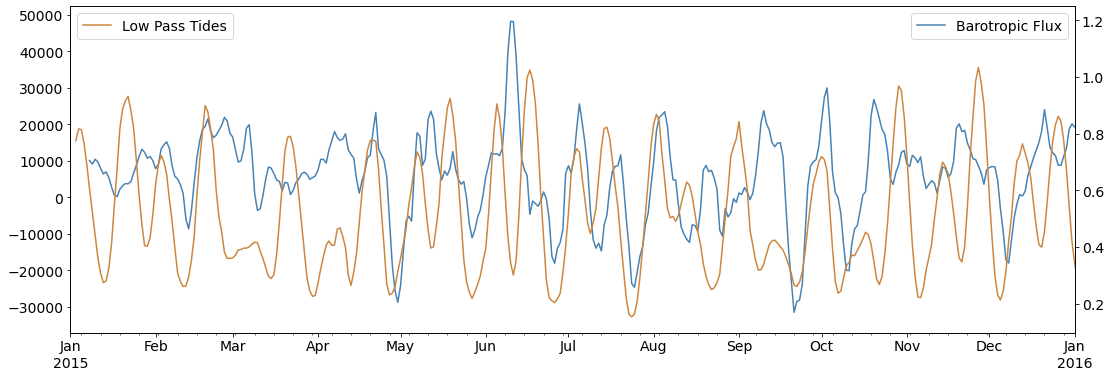

In [337]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

tropic.plot(ax=ax, label="Barotropic Flux", color='steelblue')

ax2 = ax.twinx()
low_pass_tide.vozocrtx.plot(ax=ax2, label='Low Pass Tides',  color = 'peru')

for xa in [ax, ax2]:
    xa.set_xlim(datetime.datetime(2015, 1, 1), datetime.datetime(2016, 1, 1))
    
ax.legend();
ax2.legend(loc='upper left');

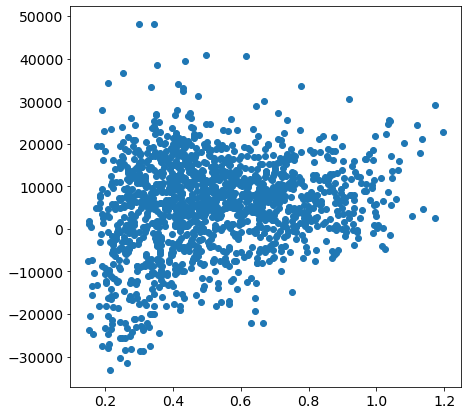

In [320]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(low_pass_tide.vozocrtx, tropic, 'o');

### Froude Number

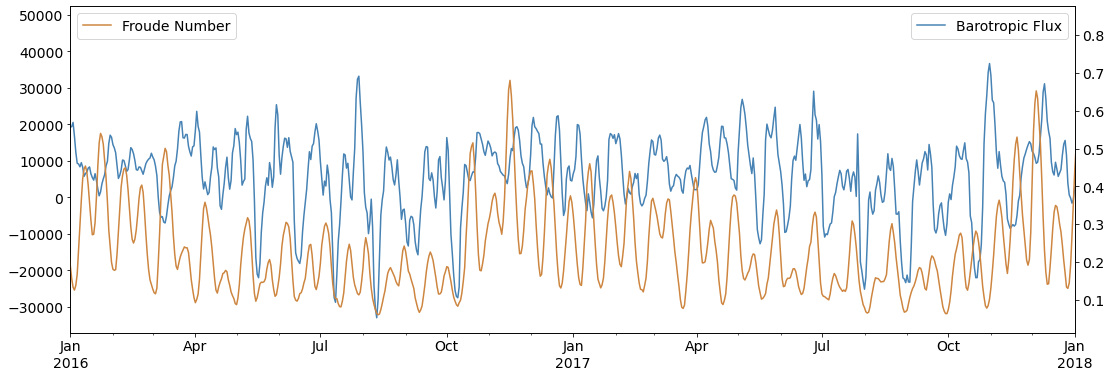

In [321]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

tropic.plot(ax=ax, label="Barotropic Flux", color='steelblue')

ax2 = ax.twinx()
myfroude.plot(ax=ax2, label='Froude Number',  color = 'peru')

for xa in [ax, ax2]:
    xa.set_xlim(datetime.datetime(2016, 1, 1), datetime.datetime(2018, 1, 1))
    
ax.legend();
ax2.legend(loc='upper left');

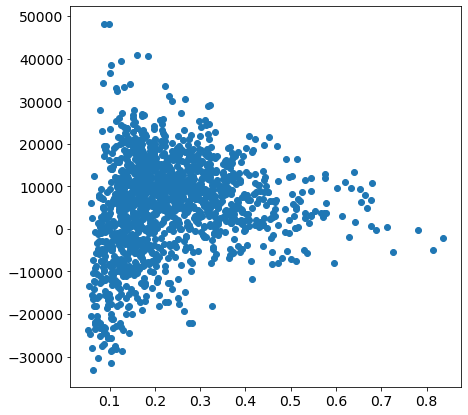

In [327]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(myfroude, tropic, 'o');

In [368]:
ssh = pd.read_csv('low_pass_ssh.csv')
low_wind = wind.rolling(4, center=True).mean()

In [495]:
base = datetime.datetime(2015, 1, 1, tzinfo=datetime.timezone.utc)
date_list = [base + datetime.timedelta(days=x) for x in range(1461)]
ssh['time'] = date_list
ssh.set_index('time', inplace=True)

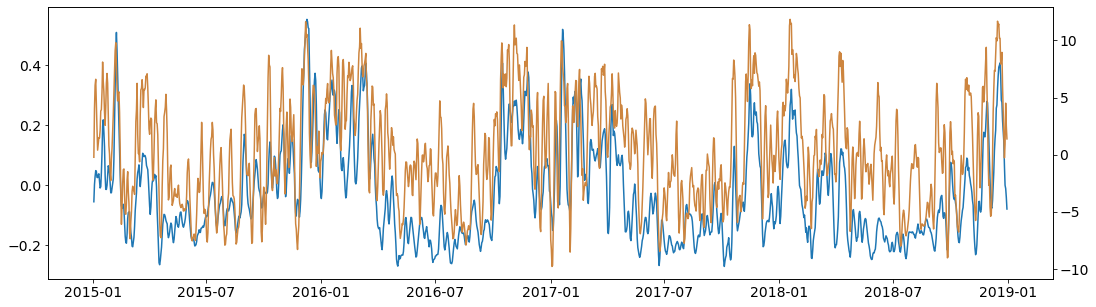

In [372]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.plot(ssh.sossheig);
ax2 = ax.twinx()
ax2.plot(low_wind.wind, color='peru');

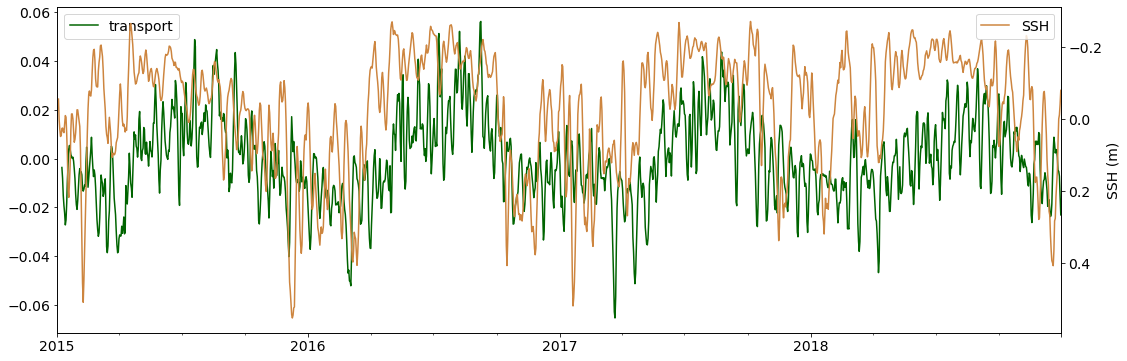

In [377]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values).plot(color='darkgreen')

ax2 = ax.twinx()
ssh.sossheig.plot(ax=ax2, y='ssh', legend=False, label='SSH',  color = 'peru')
ax2.set_ylabel('SSH (m)')
ax2.invert_yaxis()
ax.legend(loc='upper left')
ax2.legend(loc='upper right');

7 30           residual       ssh
residual  1.000000 -0.343569
ssh      -0.343569  1.000000


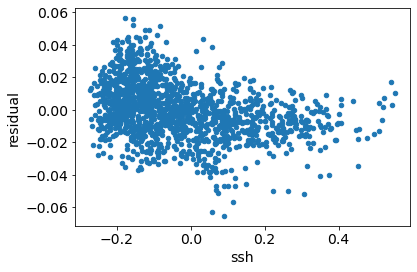

In [380]:
newds2 = pd.DataFrame({'residual': (((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values)), 
                       'ssh': ssh.sossheig.values})
newds2.plot('ssh', 'residual', 'scatter')
#plt.plot([-5, 5], [0.0037*5, -0.0037*5], 'r-')
print (lag, window, newds2.corr())

30           residual       ssh     model
residual  1.000000 -0.508518  0.534099
ssh      -0.508518  1.000000 -0.952133
model     0.534099 -0.952133  1.000000
0.014783769211280141


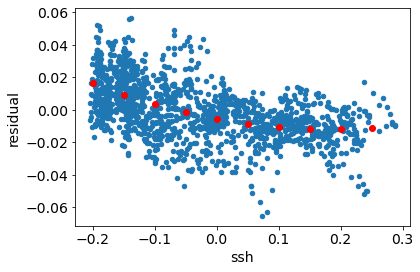

In [408]:
window = 30
sroll = ssh.rolling(window=window, center=True).mean().sossheig.values
newds2 = pd.DataFrame({'residual': (((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values)), 
                       'ssh': sroll, 
                     'model': -0.0058-0.0710*sroll + 0.1961*sroll*sroll})
newds2.plot('ssh', 'residual', 'scatter')
xs = np.arange(-0.2, 0.3, 0.05)
plt.plot(xs, -0.0058-0.0710*xs + 0.1961*xs*xs, 'ro')
print (window, newds2.corr())
print (np.sqrt(((newds2.residual - newds2.model)**2).mean()))

In [406]:
y = (((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values))
print (y)
x = ssh.sossheig.rolling(window=30, center=True).mean()
x2 = x*x
#z = densityforcing.values
X = np.column_stack((x, x2))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

2015-01-01 00:00:00+00:00         NaN
2015-01-02 00:00:00+00:00         NaN
2015-01-03 00:00:00+00:00         NaN
2015-01-04 00:00:00+00:00         NaN
2015-01-05 00:00:00+00:00         NaN
                               ...   
2018-12-27 00:00:00+00:00   -0.005235
2018-12-28 00:00:00+00:00   -0.007208
2018-12-29 00:00:00+00:00   -0.015711
2018-12-30 00:00:00+00:00   -0.023136
2018-12-31 00:00:00+00:00         NaN
Name: transport, Length: 1461, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              transport   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     284.6
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          1.02e-104
Time:                        12:52:55   Log-Likelihood:                 3994.5
No. Observations:                1429   AIC:                            -7983.
Df Residuals:                    1426   BIC:                            -7967.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.001     -9.360      0.000      -0.007      -0.005
x1            -0.0710      0.003    -23.015      0.000      -0.077      -0.065
x2             0.1961      0.027      7.295      0.000       0.143       0.249
==============================================================================
Omnibus:                       15.025   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.816
Skew:                          -0.110   Prob(JB):                     3.02e-05
Kurtosis:                       3.549   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
residual =  (((deep_flux+shallow_flux)/depthwidth/densityforcing.values - 0.0325*np.sqrt(1/myfroude).values))

In [478]:
shssh = pd.read_csv('low_pass_sshSH.csv', parse_dates=True, index_col=0)
runoff = pd.read_csv('low_pass_SoG_runoff.csv', parse_dates=True, index_col=0)

In [577]:
shssh

sossheig
time_counter                 
2015-01-01 12:00:00       NaN
2015-01-02 12:00:00       NaN
2015-01-03 12:00:00  0.001904
2015-01-04 12:00:00  0.050965
2015-01-05 12:00:00  0.072920
...                       ...
2018-12-27 12:00:00  0.030872
2018-12-28 12:00:00  0.030770
2018-12-29 12:00:00  0.054096
2018-12-30 12:00:00  0.030898
2018-12-31 12:00:00       NaN

[1461 rows x 1 columns]

<AxesSubplot:xlabel='time'>

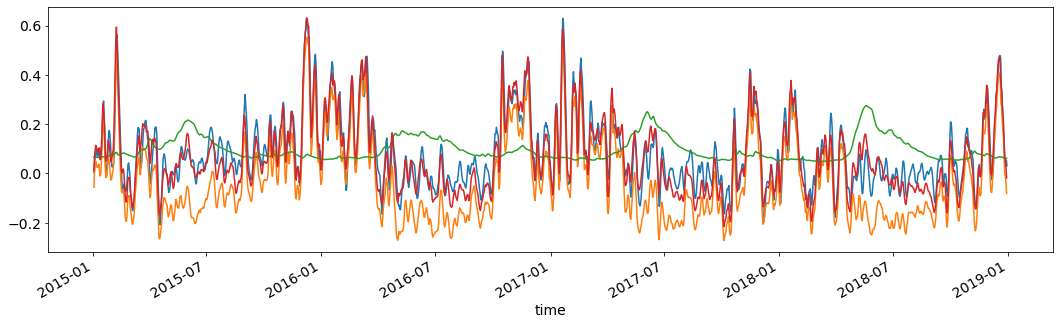

In [497]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
area = 5e4
shssh.sossheig.plot()
ssh.sossheig.plot()
(runoff.rorunoff/area).plot()
(ssh.sossheig + runoff.rorunoff/area).plot()

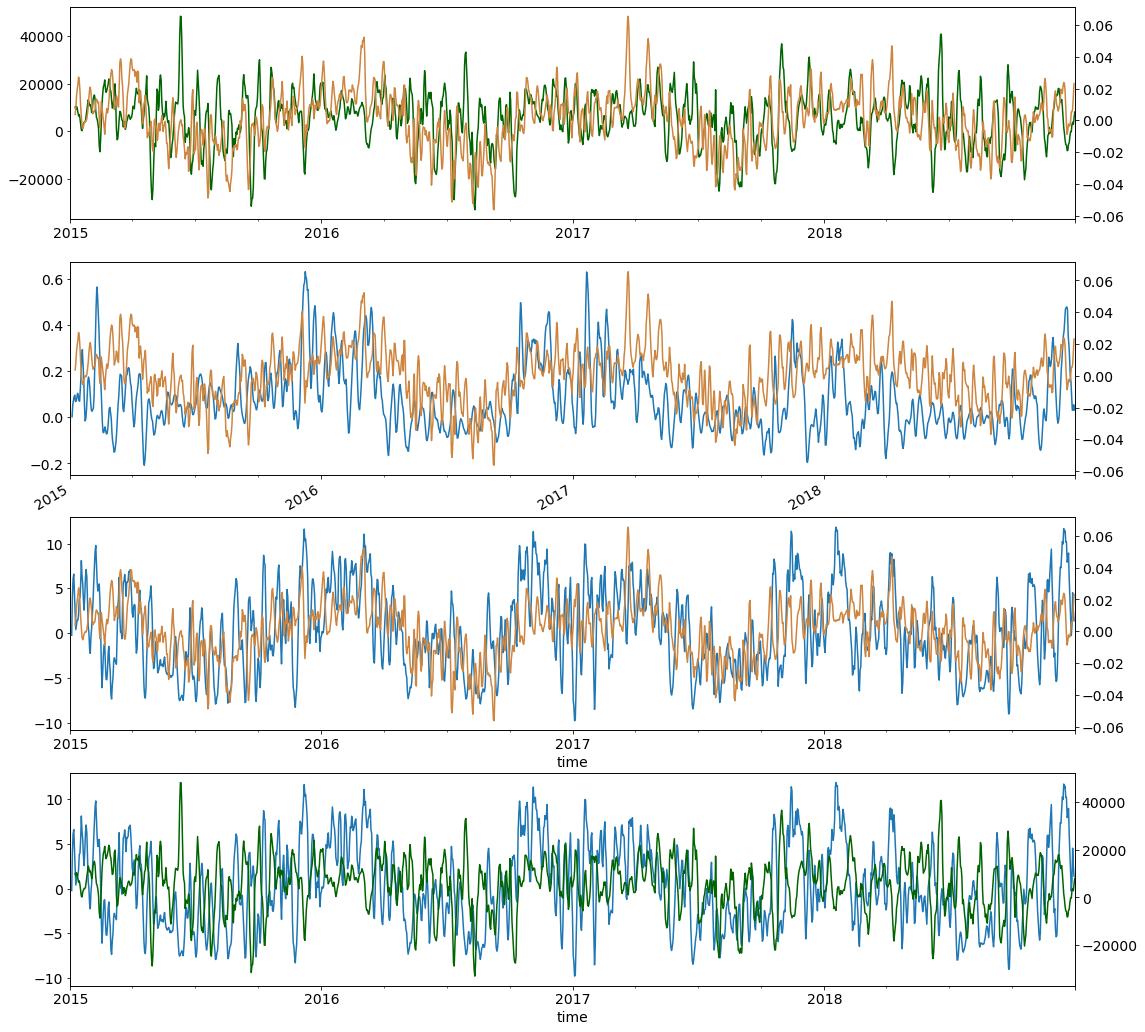

In [498]:
fig, axs = plt.subplots(4, 1, figsize=(18, 20))
tropic.plot(ax=axs[0], color='darkgreen')
axb = axs[0].twinx()
(-residual).plot(ax=axb, color='peru');
shssh.sossheig.plot(ax=axs[1]);
axc = axs[1].twinx()
(-residual).plot(ax=axc, color='peru');
axd = axs[2].twinx()
low_wind.wind.plot(ax=axs[2]);
(-residual).plot(ax=axd, color='peru');
low_wind.wind.plot(ax=axs[3]);
axe = axs[3].twinx();
tropic.plot(ax=axe, color='darkgreen');

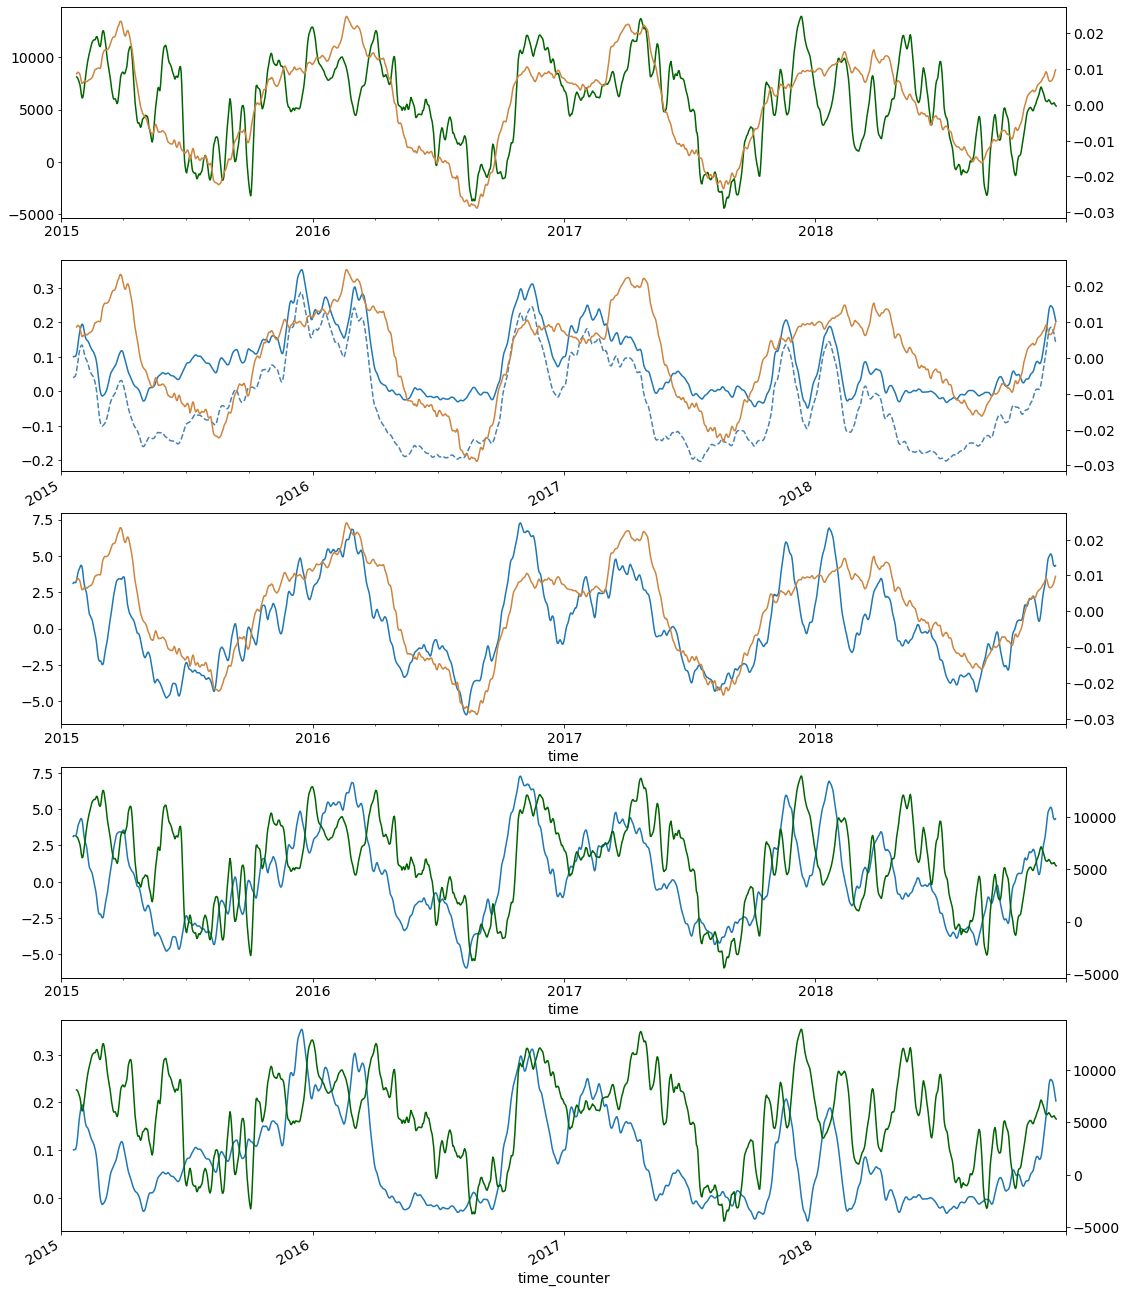

In [503]:
window = 30
fig, axs = plt.subplots(5, 1, figsize=(18, 25))
tropic.rolling(window=window, center=True).mean().plot(ax=axs[0], color='darkgreen')
axb = axs[0].twinx()
(-residual).rolling(window=window, center=True).mean().plot(ax=axb, color='peru');
shssh.sossheig.rolling(window=window, center=True).mean().plot(ax=axs[1]);
ssh.sossheig.rolling(window=window, center=True).mean().plot(ax=axs[1], linestyle='dashed', color='steelblue');
axc = axs[1].twinx()
(-residual).rolling(window=window, center=True).mean().plot(ax=axc, color='peru');
axd = axs[2].twinx()
low_wind.wind.rolling(window=window, center=True).mean().plot(ax=axs[2]);
(-residual).rolling(window=window, center=True).mean().plot(ax=axd, color='peru');
low_wind.wind.rolling(window=window, center=True).mean().plot(ax=axs[3]);
axe = axs[3].twinx();
tropic.rolling(window=window, center=True).mean().plot(ax=axe, color='darkgreen');
shssh.sossheig.rolling(window=window, center=True).mean().plot(ax=axs[4]);
axf = axs[4].twinx();
tropic.rolling(window=window, center=True).mean().plot(ax=axf, color='darkgreen');

30           residual    tropic       ssh     shssh      wind    runoff
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000


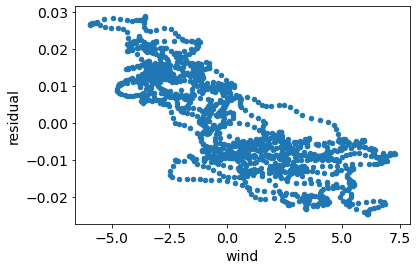

In [509]:
slow = pd.DataFrame({'residual': (residual).rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values})
slow.plot('wind', 'residual', 'scatter')
print (window, slow.corr())

30           residual    tropic       ssh     shssh      wind    runoff
residual  1.000000 -0.277165 -0.343569 -0.208925 -0.339062  0.223196
tropic   -0.277165  1.000000 -0.050101 -0.066626 -0.100372  0.061091
ssh      -0.343569 -0.050101  1.000000  0.944976  0.756131 -0.416867
shssh    -0.208925 -0.066626  0.944976  1.000000  0.692690 -0.248771
wind     -0.339062 -0.100372  0.756131  0.692690  1.000000 -0.263631
runoff    0.223196  0.061091 -0.416867 -0.248771 -0.263631  1.000000


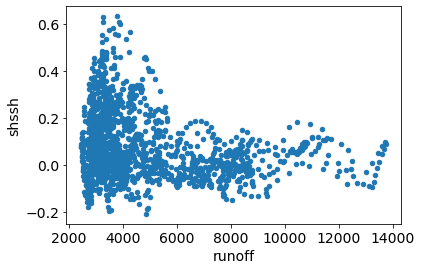

In [662]:
full = pd.DataFrame({'residual': (residual).values, 
                     'tropic': tropic.values,
                       'ssh':  ssh.sossheig.values,
                     'shssh':  shssh.sossheig.values,
                     'wind': low_wind.wind.values,
                   'runoff': runoff.rorunoff.values})
full.plot('runoff', 'shssh', 'scatter')
print (window, full.corr())

In [514]:
y = slow.tropic.values
X = slow.wind.values
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     422.7
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           1.93e-82
Time:                        14:27:57   Log-Likelihood:                -13707.
No. Observations:                1424   AIC:                         2.742e+04
Df Residuals:                    1422   BIC:                         2.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5248.5166     97.585     53.784      0.000    5057.090    5439.943
x1           665.2955     32.360     20.559      0.000     601.817     728.774
==============================================================================
Omnibus:                       50.913   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.858
Skew:                           0.099   Prob(JB):                     4.00e-06
Kurtosis:                       2.384   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

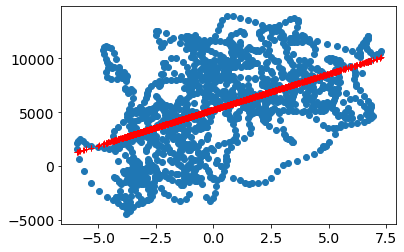

In [518]:
plt.plot(slow.wind.values, slow.tropic.values, 'o');
plt.plot(slow.wind.values, 5248 + 665*slow.wind.values, 'r+')
left = slow.tropic.values - (5248 + 665*slow.wind.values)

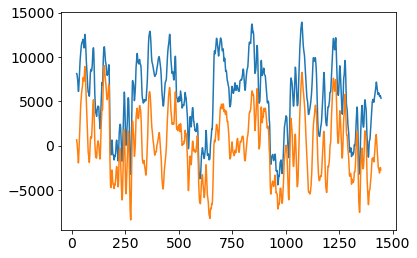

In [524]:
plt.plot(np.arange(1461), slow.tropic)
plt.plot(left)

30           residual    tropic       ssh     shssh      wind    runoff  \
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501   
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169   
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754   
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194   
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255   
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000   
tilt      0.786468 -0.422560 -0.839137 -0.675618 -0.831889  0.750108   
left     -0.385101  0.878106 -0.022149 -0.043025  0.000242  0.359907   

              tilt      left  
residual  0.786468 -0.385101  
tropic   -0.422560  0.878106  
ssh      -0.839137 -0.022149  
shssh    -0.675618 -0.043025  
wind     -0.831889  0.000242  
runoff    0.750108  0.359907  
tilt      1.000000 -0.028262  
left     -0.028262  1.000000  


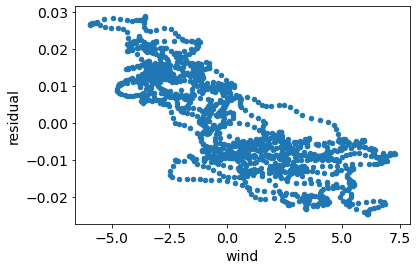

In [536]:
slow = pd.DataFrame({'residual': (residual).rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values,
                     'tilt': shssh.sossheig.rolling(window=window, center=True).mean().values -
                     ssh.sossheig.rolling(window=window, center=True).mean().values,
                   'left': left})
slow.plot('wind', 'residual', 'scatter')
print (window, slow.corr())

In [528]:
y = slow.tropic.values
X = np.column_stack((slow.wind.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     380.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.17e-133
Time:                        14:35:37   Log-Likelihood:                -13587.
No. Observations:                1424   AIC:                         2.718e+04
Df Residuals:                    1421   BIC:                         2.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1775.9631    233.019      7.622      0.000    1318.865    2233.061
x1           878.1945     32.546     26.983      0.000     814.350     942.039
x2             0.7051      0.044     16.148      0.000       0.619       0.791
==============================================================================
Omnibus:                       25.899   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.123
Skew:                           0.292   Prob(JB):                     3.51e-06
Kurtosis:                       2.714   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [530]:
estimate = 1776 + 878*slow.wind.values + 0.705*slow.runoff.values

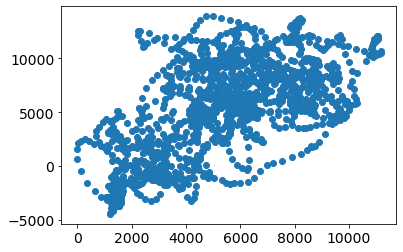

In [532]:
plt.plot(estimate, slow.tropic.values, 'o')

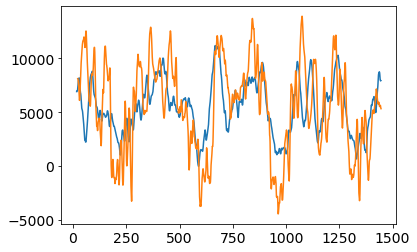

In [534]:
plt.plot(estimate)
plt.plot(np.arange(1461), slow.tropic)

In [538]:
y = slow.tropic.values
X = slow.tilt.values
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     309.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           9.17e-63
Time:                        14:42:40   Log-Likelihood:                -13752.
No. Observations:                1424   AIC:                         2.751e+04
Df Residuals:                    1422   BIC:                         2.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9959.2658    276.636     36.001      0.000    9416.608    1.05e+04
x1         -4.079e+04   2319.929    -17.581      0.000   -4.53e+04   -3.62e+04
==============================================================================
Omnibus:                       79.592   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.624
Skew:                          -0.012   Prob(JB):                     2.24e-07
Kurtosis:                       2.282   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

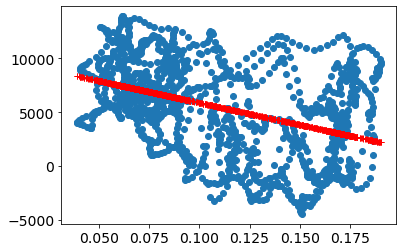

In [542]:
plt.plot(slow.tilt.values, slow.tropic.values, 'o');
plt.plot(slow.tilt.values, 9959-4.08e4*slow.tilt.values, 'r+');
left2 = slow.tropic.values - (9959-4.08e4*slow.tilt.values)

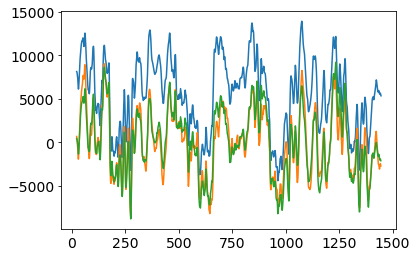

In [545]:
plt.plot(slow.tropic.values)
plt.plot(left)
plt.plot(left2)

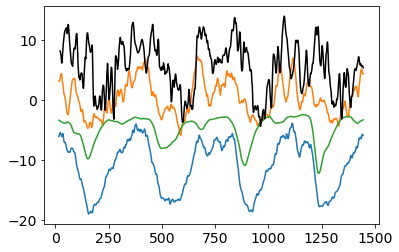

In [561]:
plt.plot(-slow.tilt.values*100)
plt.plot(slow.wind.values)
plt.plot(-slow.runoff.values/1000)
plt.plot(slow.tropic.values/1000, 'k')

In [569]:
y = slow.tropic.values
X = np.column_stack((slow.tilt.values, slow.wind.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     922.7
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:54:43   Log-Likelihood:                -13122.
No. Observations:                1424   AIC:                         2.625e+04
Df Residuals:                    1420   BIC:                         2.627e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.299e+04    352.848     36.825      0.000    1.23e+04    1.37e+04
x1         -1.667e+05   4608.499    -36.164      0.000   -1.76e+05   -1.58e+05
x2          -636.2389     48.015    -13.251      0.000    -730.427    -542.050
x3             2.2964      0.054     42.428      0.000       2.190       2.403
==============================================================================
Omnibus:                       10.518   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.703
Skew:                           0.208   Prob(JB):                      0.00474
Kurtosis:                       2.915   Cond. No.                     3.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

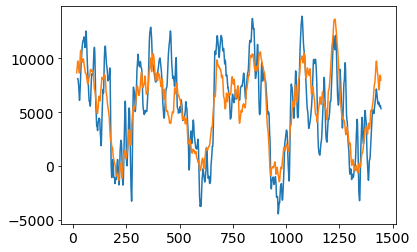

In [568]:
plt.plot(slow.tropic)
plt.plot(1.3e4 -1.67e5*slow.tilt - 636*slow.wind + 2.3*slow.runoff)

In [570]:
y = slow.tropic.values
X = np.column_stack((slow.tilt.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          1.73e-298
Time:                        14:55:00   Log-Likelihood:                -13205.
No. Observations:                1424   AIC:                         2.642e+04
Df Residuals:                    1421   BIC:                         2.643e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8967.1178    190.047     47.184      0.000    8594.314    9339.921
x1         -1.134e+05   2389.093    -47.467      0.000   -1.18e+05   -1.09e+05
x2             1.8706      0.046     40.531      0.000       1.780       1.961
==============================================================================
Omnibus:                       22.018   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.732
Skew:                           0.235   Prob(JB):                     5.19e-05
Kurtosis:                       2.667   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [571]:
y = slow.tropic.values
X = slow.tilt.values
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     309.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           9.17e-63
Time:                        14:55:58   Log-Likelihood:                -13752.
No. Observations:                1424   AIC:                         2.751e+04
Df Residuals:                    1422   BIC:                         2.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9959.2658    276.636     36.001      0.000    9416.608    1.05e+04
x1         -4.079e+04   2319.929    -17.581      0.000   -4.53e+04   -3.62e+04
==============================================================================
Omnibus:                       79.592   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.624
Skew:                          -0.012   Prob(JB):                     2.24e-07
Kurtosis:                       2.282   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

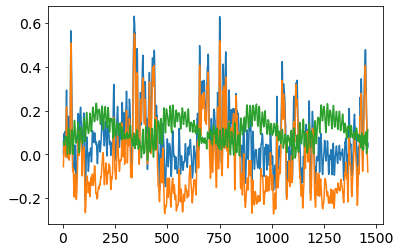

In [585]:
plt.plot(shssh.sossheig.values)
plt.plot(ssh.sossheig.values)
plt.plot((shssh.sossheig.values - ssh.sossheig.values));

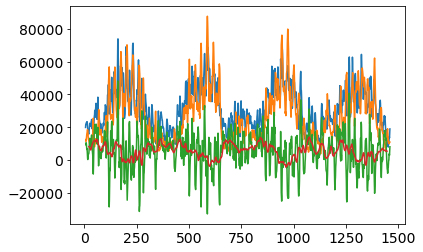

In [590]:
plt.plot(shallow_flux.values);
plt.plot(deep_flux.values);
plt.plot(shallow_flux.values - deep_flux.values)
plt.plot(slow.tropic.values)

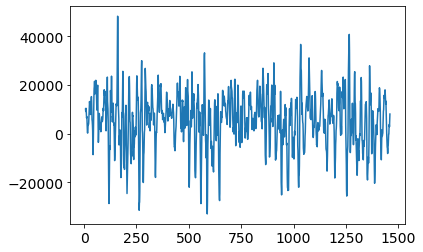

In [591]:
plt.plot(shallow_flux.values - deep_flux.values)

In [592]:
y = slow.tropic.values
X = np.column_stack((slow.wind.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     380.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.17e-133
Time:                        15:11:49   Log-Likelihood:                -13587.
No. Observations:                1424   AIC:                         2.718e+04
Df Residuals:                    1421   BIC:                         2.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1775.9631    233.019      7.622      0.000    1318.865    2233.061
x1           878.1945     32.546     26.983      0.000     814.350     942.039
x2             0.7051      0.044     16.148      0.000       0.619       0.791
==============================================================================
Omnibus:                       25.899   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.123
Skew:                           0.292   Prob(JB):                     3.51e-06
Kurtosis:                       2.714   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

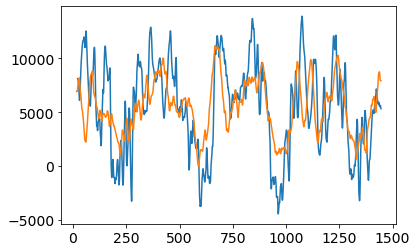

In [595]:
plt.plot(slow.tropic)
plt.plot(1776  + 878*slow.wind + 0.705*slow.runoff)

In [599]:
y = slow.residual.values

model11 = sm.OLS(y, slow.wind.values, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.629
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              2415.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                   6.54e-309
Time:                        15:17:05   Log-Likelihood:                          4888.7
No. Observations:                1424   AIC:                                     -9775.
Df Residuals:                    1423   BIC:                                     -9770.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0034   6.87e-05    -49.146      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       32.315   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.157
Skew:                          -0.144   Prob(JB):                     4.20e-05
Kurtosis:                       2.493   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
y = slow.tropic.values
X = slow.residual.values
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     1522.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          6.32e-227
Time:                        15:21:30   Log-Likelihood:                -13374.
No. Observations:                1424   AIC:                         2.675e+04
Df Residuals:                    1422   BIC:                         2.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5412.8929     76.945     70.347      0.000    5261.954    5563.831
x1         -2.339e+05   5996.735    -39.009      0.000   -2.46e+05   -2.22e+05
==============================================================================
Omnibus:                       35.388   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.048
Skew:                           0.109   Prob(JB):                     4.43e-05
Kurtosis:                       2.461   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

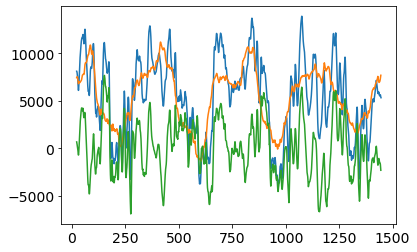

In [613]:
plt.plot(slow.tropic.values)
plt.plot(5413 - 2.34e5*slow.residual.values)
next = slow.tropic.values -(5413 - 2.34e5*slow.residual.values)
plt.plot(next)

30           residual    tropic       ssh     shssh      wind    runoff  \
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501   
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169   
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754   
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194   
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255   
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000   
tilt      0.786468 -0.422560 -0.839137 -0.675618 -0.831889  0.750108   
next      0.000337  0.694791 -0.125256 -0.074859 -0.134985  0.491903   

              tilt      next  
residual  0.786468  0.000337  
tropic   -0.422560  0.694791  
ssh      -0.839137 -0.125256  
shssh    -0.675618 -0.074859  
wind     -0.831889 -0.134985  
runoff    0.750108  0.491903  
tilt      1.000000  0.205856  
next      0.205856  1.000000  


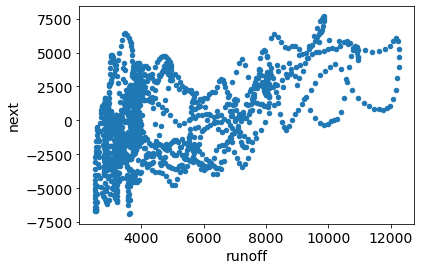

In [615]:
slow = pd.DataFrame({'residual': (residual).rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values,
                     'tilt': shssh.sossheig.rolling(window=window, center=True).mean().values -
                     ssh.sossheig.rolling(window=window, center=True).mean().values,
                   'next': next})
slow.plot('runoff', 'next', 'scatter')
print (window, slow.corr())

In [616]:
y = slow.tropic.values
X = np.column_stack((slow.residual.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.57e-321
Time:                        15:26:05   Log-Likelihood:                -13153.
No. Observations:                1424   AIC:                         2.631e+04
Df Residuals:                    1421   BIC:                         2.633e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2005.3805    163.718     12.249      0.000    1684.226    2326.535
x1         -2.714e+05   5394.671    -50.308      0.000   -2.82e+05   -2.61e+05
x2             0.7030      0.031     22.737      0.000       0.642       0.764
==============================================================================
Omnibus:                       33.224   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.525
Skew:                           0.020   Prob(JB):                     0.000156
Kurtosis:                       2.458   Cond. No.                     4.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

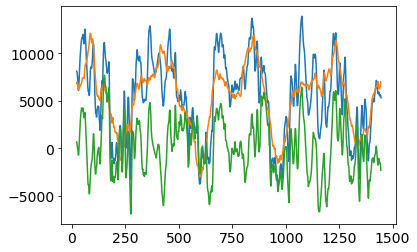

In [617]:
plt.plot(slow.tropic.values)
plt.plot(2005 - 2.71e5*slow.residual.values +0.703*slow.runoff.values)
next2 = slow.tropic.values -(2005 - 2.71e5*slow.residual.values +0.703*slow.runoff.values)
plt.plot(next)

30           residual    tropic       ssh     shssh      wind    runoff  \
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501   
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169   
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754   
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194   
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255   
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000   
tilt      0.786468 -0.422560 -0.839137 -0.675618 -0.831889  0.750108   
next      0.000337  0.694791 -0.125256 -0.074859 -0.134985  0.491903   
next2    -0.002053  0.596620  0.076812  0.065198 -0.053122 -0.000642   

              tilt      next     next2  
residual  0.786468  0.000337 -0.002053  
tropic   -0.422560  0.694791  0.596620  
ssh      -0.839137 -0.125256  0.076812  
shssh    -0.675618 -0.074859  0.065198  
wind     -0.831889 -0.134985 -0.053122  
runoff    0.750108  0.491903 -

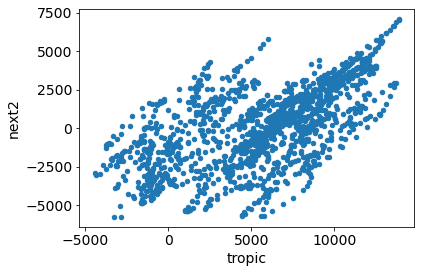

In [620]:
slow = pd.DataFrame({'residual': (residual).rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values,
                     'tilt': shssh.sossheig.rolling(window=window, center=True).mean().values -
                     ssh.sossheig.rolling(window=window, center=True).mean().values,
                   'next': next,
                    'next2':next2})
slow.plot('tropic', 'next2', 'scatter')
print (window, slow.corr())

In [622]:
y = slow.tropic.values
X = slow.wind.values
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     422.7
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           1.93e-82
Time:                        15:30:59   Log-Likelihood:                -13707.
No. Observations:                1424   AIC:                         2.742e+04
Df Residuals:                    1422   BIC:                         2.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5248.5166     97.585     53.784      0.000    5057.090    5439.943
x1           665.2955     32.360     20.559      0.000     601.817     728.774
==============================================================================
Omnibus:                       50.913   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.858
Skew:                           0.099   Prob(JB):                     4.00e-06
Kurtosis:                       2.384   Cond. No.                         3.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

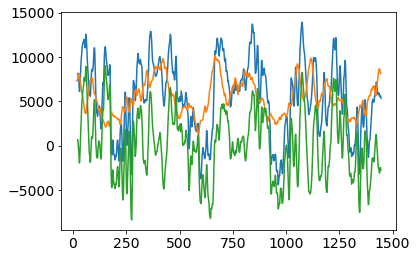

In [623]:
plt.plot(slow.tropic.values)
plt.plot(5248 + 665 * slow.wind.values)
again = slow.tropic.values - (5248 + 665 * slow.wind.values)
plt.plot(again)

30           residual    tropic       ssh     shssh      wind    runoff  \
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501   
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169   
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754   
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194   
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255   
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000   
tilt      0.786468 -0.422560 -0.839137 -0.675618 -0.831889  0.750108   
again    -0.385101  0.878106 -0.022149 -0.043025  0.000242  0.359907   

              tilt     again  
residual  0.786468 -0.385101  
tropic   -0.422560  0.878106  
ssh      -0.839137 -0.022149  
shssh    -0.675618 -0.043025  
wind     -0.831889  0.000242  
runoff    0.750108  0.359907  
tilt      1.000000 -0.028262  
again    -0.028262  1.000000  


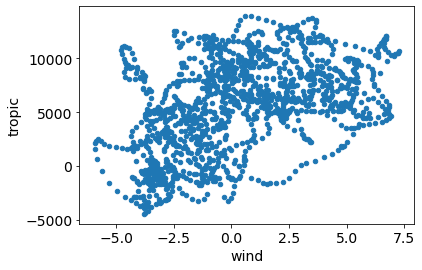

In [626]:
slow = pd.DataFrame({'residual': (residual).rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values,
                     'tilt': shssh.sossheig.rolling(window=window, center=True).mean().values -
                     ssh.sossheig.rolling(window=window, center=True).mean().values,
                   'again': again})
slow.plot('wind', 'tropic', 'scatter')
print (window, slow.corr())

In [627]:
y = slow.tropic.values
X = np.column_stack((slow.wind.values, slow.runoff.values))
X = sm.add_constant(X)

model11 = sm.OLS(y, X, missing='drop').fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     380.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.17e-133
Time:                        15:34:31   Log-Likelihood:                -13587.
No. Observations:                1424   AIC:                         2.718e+04
Df Residuals:                    1421   BIC:                         2.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1775.9631    233.019      7.622      0.000    1318.865    2233.061
x1           878.1945     32.546     26.983      0.000     814.350     942.039
x2             0.7051      0.044     16.148      0.000       0.619       0.791
==============================================================================
Omnibus:                       25.899   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.123
Skew:                           0.292   Prob(JB):                     3.51e-06
Kurtosis:                       2.714   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

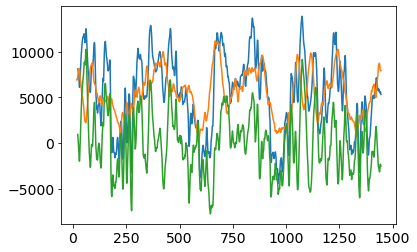

In [630]:
plt.plot(slow.tropic.values)
plt.plot(1776 + 878 * slow.wind.values +0.705*slow.runoff.values)
again2 = slow.tropic.values - (1776 + 878 * slow.wind.values +0.705*slow.runoff.values)
plt.plot(again2)

30           residual    tropic       ssh     shssh      wind    runoff  \
residual  1.000000 -0.718978 -0.666402 -0.540508 -0.796008  0.305501   
tropic   -0.718978  1.000000  0.392227  0.336710  0.478679  0.122169   
ssh      -0.666402  0.392227  1.000000  0.967942  0.860480 -0.553754   
shssh    -0.540508  0.336710  0.967942  1.000000  0.782178 -0.404194   
wind     -0.796008  0.478679  0.860480  0.782178  1.000000 -0.406255   
runoff    0.305501  0.122169 -0.553754 -0.404194 -0.406255  1.000000   
tilt      0.786468 -0.422560 -0.839137 -0.675618 -0.831889  0.750108   
again    -0.385101  0.878106 -0.022149 -0.043025  0.000242  0.359907   
again2   -0.410910  0.807150  0.071672 -0.006184  0.000149 -0.000011   
wsetup   -0.740849  0.429811  0.858424  0.791854  0.984306 -0.398402   

              tilt     again    again2    wsetup  
residual  0.786468 -0.385101 -0.410910 -0.740849  
tropic   -0.422560  0.878106  0.807150  0.429811  
ssh      -0.839137 -0.022149  0.071672  0.858424  


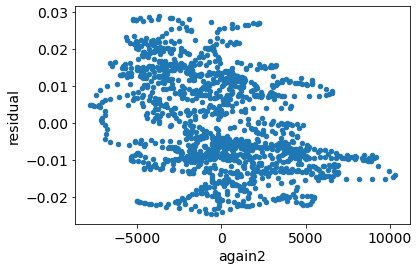

In [707]:
slow = pd.DataFrame({'residual': residual.rolling(window=window, center=True).mean().values, 
                     'tropic': tropic.rolling(window=window, center=True).mean().values,
                       'ssh':  ssh.sossheig.rolling(window=window, center=True).mean().values,
                     'shssh':  shssh.sossheig.rolling(window=window, center=True).mean().values,
                     'wind': low_wind.wind.rolling(window=window, center=True).mean().values,
                    'runoff': runoff.rorunoff.rolling(window=window,center=True).mean().values,
                     'tilt': shssh.sossheig.rolling(window=window, center=True).mean().values -
                     ssh.sossheig.rolling(window=window, center=True).mean().values,
                   'again': again,
                    'again2': again2,
                    'wsetup': w_setup.rolling(window=window, center=True).mean().values})
slow.plot('again2', 'residual', 'scatter')
print (window, slow.corr())

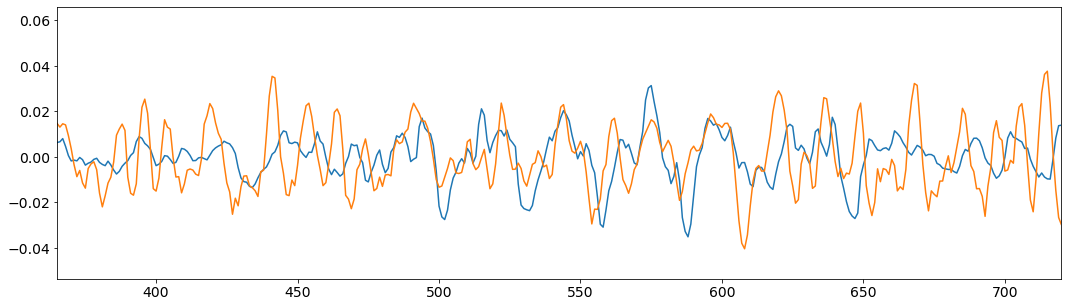

In [753]:
lag = 0
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
#plt.plot(full.residual)
plt.plot((full.tropic - slow.tropic)/1e6);
plt.plot(np.arange(lag, 1461+lag), -(full.wind - slow.wind)/200);
plt.xlim(365,720);

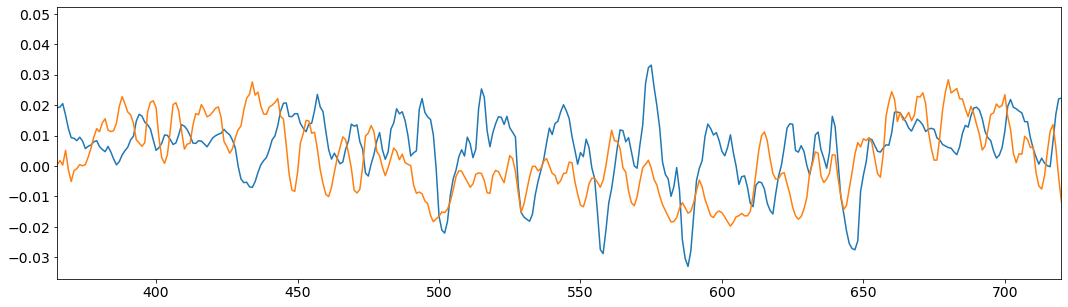

In [766]:
lag = 7
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
#plt.plot(full.residual)
plt.plot((full.tropic)/1e6);
plt.plot(np.arange(lag, 1461+lag), (full.wind)/400);
plt.xlim(365,720);

18           a         b
a  1.000000  0.730699
b  0.730699  1.000000


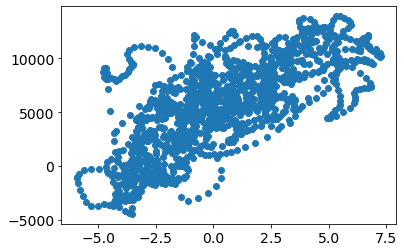

In [824]:
lag = 18
plt.plot(slow.wind[:-lag], slow.tropic[lag:], 'o');
tester = pd.DataFrame({'a': slow.wind[:-lag].values,
                       'b': slow.tropic[lag:].values})
print (lag, tester.corr())

11           a         b
a  1.000000  0.416713
b  0.416713  1.000000


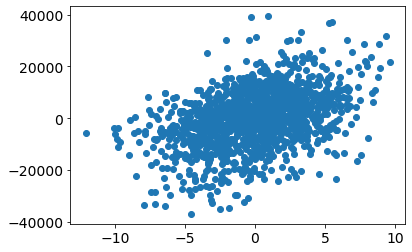

In [825]:
lag = 11
if lag > 0:
    plt.plot(full.wind[:-lag] - slow.wind[:-lag], full.tropic[lag:] - slow.tropic[lag:], 'o')
else:
    plt.plot(full.wind - slow.wind, full.tropic - slow.tropic, 'o')
    
    
tester = pd.DataFrame({'a': full.wind[:-lag].values - slow.wind[:-lag].values,
                       'b': full.tropic[lag:].values - slow.tropic[lag:].values})
print (lag, tester.corr())

(365.0, 720.0)

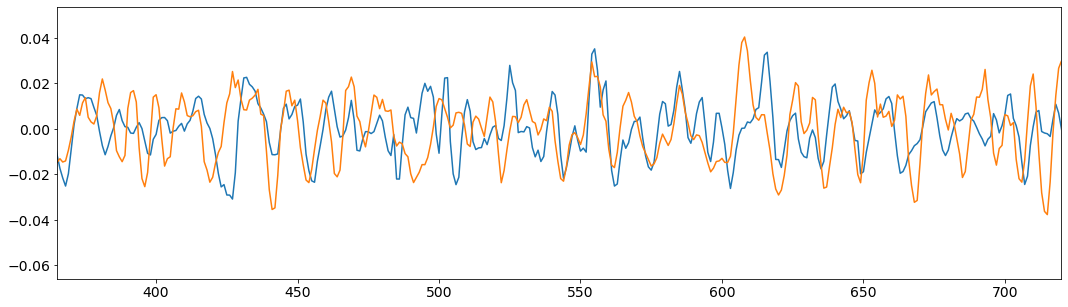

In [801]:
lag = 0
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
plt.plot(np.arange(lag,lag+1461), full.residual - slow.residual)
#plt.plot((full.tropic - slow.tropic)/1e6);
plt.plot((full.wind - slow.wind)/200);
plt.xlim(365,720)

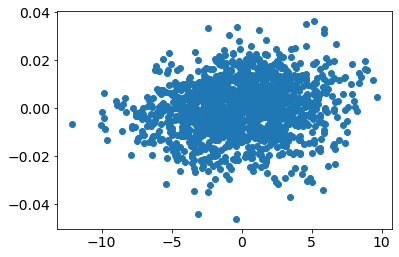

In [673]:
plt.plot(full.wind - slow.wind, full.residual - slow.residual, 'o')

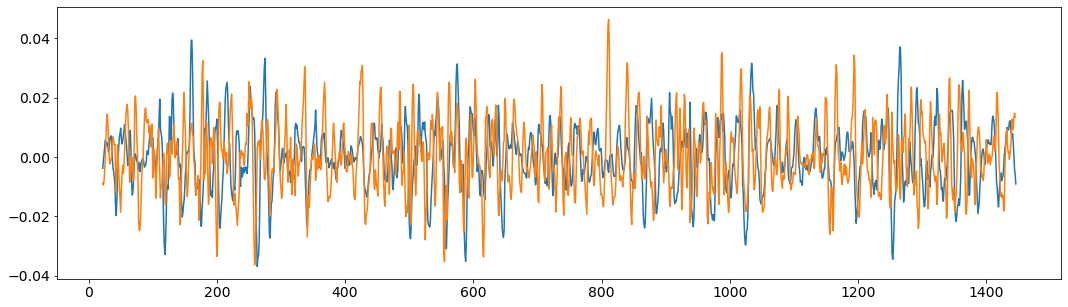

In [674]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
plt.plot((full.tropic - slow.tropic)/1e6);
plt.plot(-(full.residual - slow.residual));

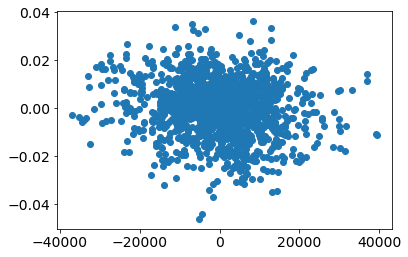

In [677]:
plt.plot(full.tropic - slow.tropic, full.residual - slow.residual,'o');


30             tropic  residual      wind     shssh       ssh      tilt
tropic    1.000000 -0.125492 -0.347287 -0.240405 -0.319115  0.185180
residual -0.125492  1.000000  0.149994  0.159560  0.155667  0.040986
wind     -0.347287  0.149994  1.000000  0.609047  0.648400 -0.001535
shssh    -0.240405  0.159560  0.609047  1.000000  0.946853  0.341560
ssh      -0.319115  0.155667  0.648400  0.946853  1.000000  0.021086
tilt      0.185180  0.040986 -0.001535  0.341560  0.021086  1.000000


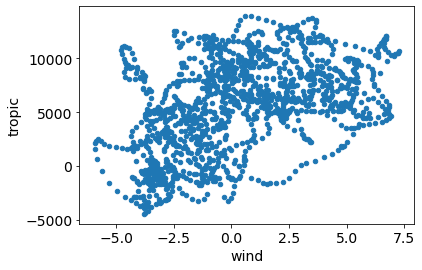

In [736]:
fast = pd.DataFrame({'tropic': full.tropic - slow.tropic,
                     'residual': full.residual - slow.residual,
                     'wind': full.wind - slow.wind,
                    'shssh': full.shssh - slow.shssh,
                    'ssh': full.ssh - slow.ssh,
                    'tilt': (full.shssh - full.ssh) -slow.tilt})
slow.plot('wind', 'tropic', 'scatter')
print (window, fast.corr())

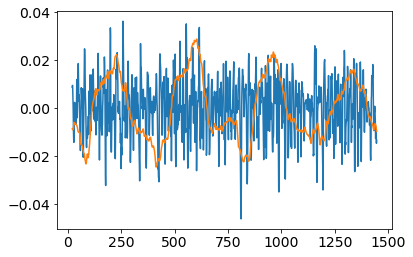

In [682]:
plt.plot(fast.residual)
plt.plot(slow.residual)

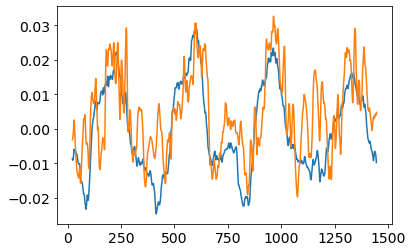

In [700]:
plt.plot(slow.residual)
plt.plot(-slow.tropic/350000.+0.02)

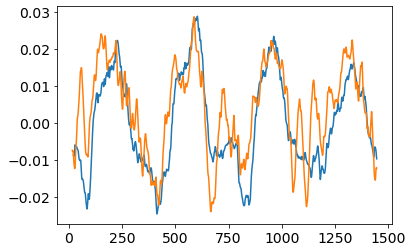

In [703]:
plt.plot(slow.residual)
plt.plot(-slow.wind/250 + 0.005)

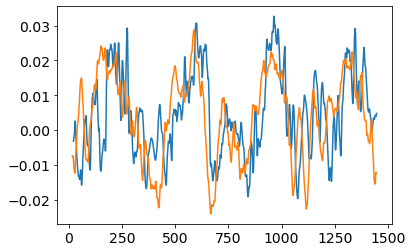

In [702]:
plt.plot(-slow.tropic/350000.+0.02)
plt.plot(-slow.wind/250+0.005)

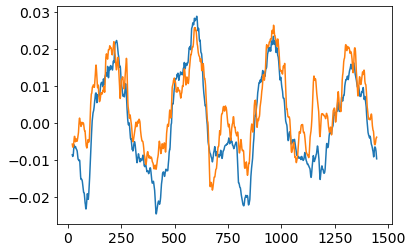

In [705]:
plt.plot(slow.residual);
plt.plot(0.5*(-slow.tropic/350000.+0.02)+ 0.5*(-slow.wind/250+0.005));

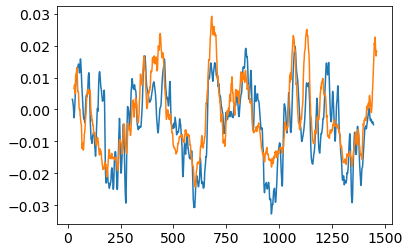

In [730]:
lag = 15
plt.plot(slow.tropic/350000.-0.02);
plt.plot(np.arange(lag, 1461+lag), slow.wsetup/10 -0.005);

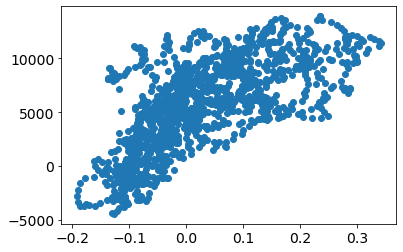

In [732]:
plt.plot(slow.wsetup[:-lag], slow.tropic[lag:], 'o');